# Working on Iris Dataset with Pandas

In [447]:
import pandas as pd
from sklearn import datasets
import numpy as np
from scipy.stats import norm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Load Iris dataset

In [481]:
iris = datasets.load_iris()

In [482]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [483]:
columnNames = [' '.join(f.split()[:-1]) for f in iris['feature_names']]
df = pd.DataFrame(iris['data'], columns=columnNames)
df['target'] = iris['target']

In [484]:
df[:50].sample(10)
df.info()
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length    150
sepal width     150
petal length    150
petal width     150
target          150
dtype: int64

In [485]:
df.drop('target', axis=1).describe().round(2)

sepal length  sepal width  petal length  petal width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

In [486]:
df.drop('target', axis=1).corr(method='pearson')

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000

In [487]:
df.drop('target', axis=1).corr(method='kendall')

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.076997      0.718516     0.655309
sepal width      -0.076997     1.000000     -0.185994    -0.157126
petal length      0.718516    -0.185994      1.000000     0.806891
petal width       0.655309    -0.157126      0.806891     1.000000

In [488]:
df.drop('target', axis=1).corr(method='spearman')

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.166778      0.881898     0.834289
sepal width      -0.166778     1.000000     -0.309635    -0.289032
petal length      0.881898    -0.309635      1.000000     0.937667
petal width       0.834289    -0.289032      0.937667     1.000000

In [489]:
mu = df['sepal length'].mean()
sigma = df['sepal length'].std(ddof = 1)

df['P(x <= sepal length)'] = df['sepal length'].apply(lambda x: norm.cdf(x, loc=mu, scale=sigma))
df

sepal length  sepal width  petal length  petal width  target  \
0             5.1          3.5           1.4          0.2       0   
1             4.9          3.0           1.4          0.2       0   
2             4.7          3.2           1.3          0.2       0   
3             4.6          3.1           1.5          0.2       0   
4             5.0          3.6           1.4          0.2       0   
..            ...          ...           ...          ...     ...   
145           6.7          3.0           5.2          2.3       2   
146           6.3          2.5           5.0          1.9       2   
147           6.5          3.0           5.2          2.0       2   
148           6.2          3.4           5.4          2.3       2   
149           5.9          3.0           5.1          1.8       2   

     P(x <= sepal length)  
0                0.184680  
1                0.127310  
2                0.083681  
3                0.066614  
4                0.154235  
..                    ...  
145              0.849558  
146              0.709350  
147              0.786115  
148              0.666665  
149              0.527279  

[150 rows x 6 columns]

In [490]:
df.groupby('target')['petal length'].agg([np.mean, np.std, lambda x: np.mean(x)+1])

mean       std  <lambda_0>
target                             
0       1.462  0.173664       2.462
1       4.260  0.469911       5.260
2       5.552  0.551895       6.552

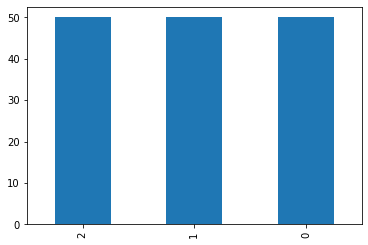

In [128]:
df['target'].value_counts().plot(kind='bar')

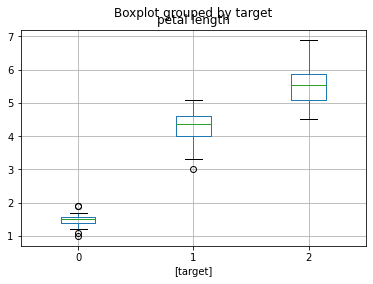

In [129]:
df[['petal length', 'target']].boxplot(by='target')

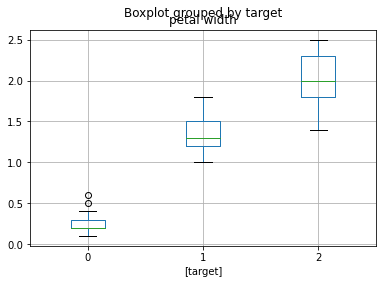

In [130]:
df[['petal width', 'target']].boxplot(by='target')

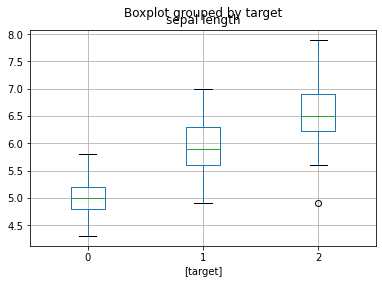

In [121]:
df[['sepal length', 'target']].boxplot(by='target')

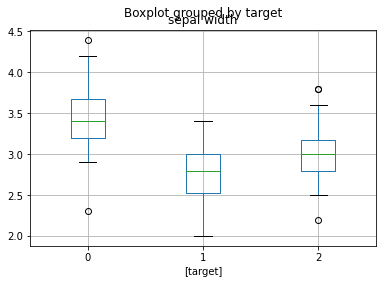

In [131]:
df[['sepal width', 'target']].boxplot(by='target')

# Exercise 1

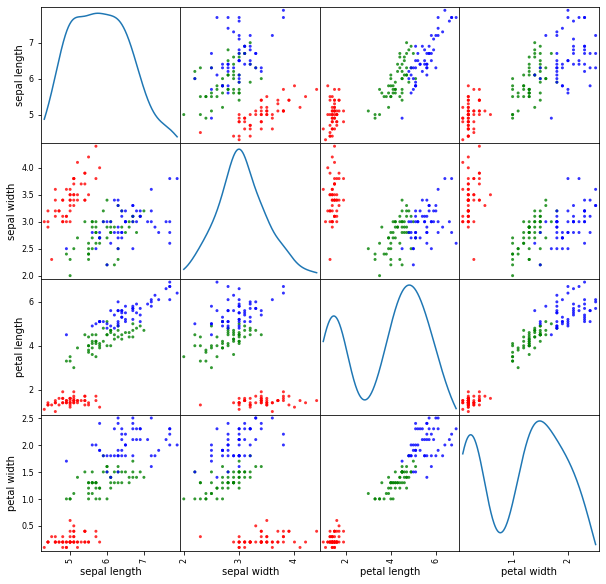

In [176]:
colors = {0:'red',1:'green',2:'blue'}
_ = scatter_matrix(df[['sepal length', 'sepal width', 'petal length', 'petal width']], alpha=0.8, figsize=(10, 10), diagonal="kde", c=df['target'].map(colors),
            cmap='viridis')

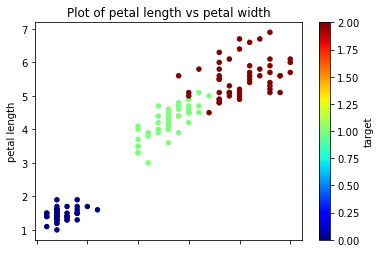

In [106]:
df.plot.scatter(x='petal width', y='petal length', title='Plot of petal length vs petal width', c='target', colormap='jet')

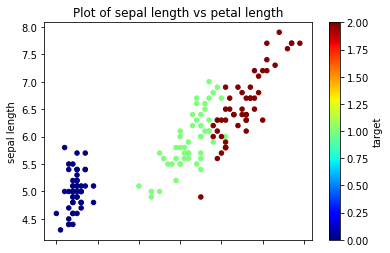

In [96]:
df.plot.scatter(x='petal length', y='sepal length', title='Plot of sepal length vs petal length', c='target', colormap='jet')

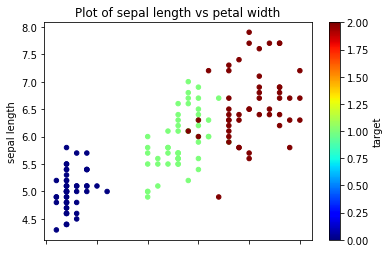

In [95]:
df.plot.scatter(x='petal width', y='sepal length', title='Plot of sepal length vs petal width', c='target', colormap='jet')

# Challenge

In [492]:
cd /Users/ariel/Desktop/CityUEEGEF2022/gef2021_aiot_exercise_notebooks/pandas/original_data/

/Users/ariel/Desktop/CityUEEGEF2022/gef2021_aiot_exercise_notebooks/pandas/original_data


In [493]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f) and f[0:7]=='subject']
windowsPerSec = 250
colNames = ['TP9', 'AF7', 'AF8', 'TP10']

In [494]:
def setupDfAndRollingWindow(filename):
    csv = pd.read_csv(filename)
    df = pd.DataFrame(csv)
    df['time'] = pd.to_datetime(df['timestamps'], unit='s', origin='unix')

    #deleting extra columns
    del df['timestamps']
    del df['Right AUX']
    
    roll = df.rolling(window=windowsPerSec)
    
    return df, roll

In [495]:
def plotAndSave(filename, roll, arrangeBySensor=False):
    '''
    Cannot plot all columns together --> different scale in x-axis --> gaps form
    solution --> create new dataframe to store the statistical features at a sliding window of 250 with step size 125
    '''
    sfdf = pd.DataFrame() #statistical feature dataframe
    
    if arrangeBySensor:
        #calculate and arrage by sensor
        for col in colNames:
            sfdf[col+'mean'] = roll[col].mean().loc[::windowsPerSec//2]
            sfdf[col+'std'] = roll[col].std(ddof=0).loc[::windowsPerSec//2]
            sfdf[col+'skew'] = roll[col].skew().loc[::windowsPerSec//2]
            sfdf[col+'kurt'] = roll[col].kurt().loc[::windowsPerSec//2]   
    else:
        #calculate and arrage by statistical feature
        sfdf['TP9mean'], sfdf['AF7mean'], sfdf['AF8mean'], sfdf['TP10mean'] = roll['TP9'].mean().loc[::windowsPerSec//2], roll['AF7'].mean().loc[::windowsPerSec//2], roll['AF8'].mean().loc[::windowsPerSec//2], roll['TP10'].mean().loc[::windowsPerSec//2]
        sfdf['TP9std'], sfdf['AF7std'], sfdf['AF8std'], sfdf['TP10std'] = roll['TP9'].std(ddof=0).loc[::windowsPerSec//2], roll['AF7'].std(ddof=0).loc[::windowsPerSec//2], roll['AF8'].std(ddof=0).loc[::windowsPerSec//2], roll['TP10'].std(ddof=0).loc[::windowsPerSec//2]
        sfdf['TP9skew'], sfdf['AF7skew'], sfdf['AF8skew'], sfdf['TP10skew'] = roll['TP9'].skew().loc[::windowsPerSec//2], roll['AF7'].skew().loc[::windowsPerSec//2], roll['AF8'].skew().loc[::windowsPerSec//2], roll['TP10'].skew().loc[::windowsPerSec//2]
        sfdf['TP9kurt'], sfdf['AF7kurt'], sfdf['AF8kurt'], sfdf['TP10kurt'] = roll['TP9'].kurt().loc[::windowsPerSec//2], roll['AF7'].kurt().loc[::windowsPerSec//2], roll['AF8'].kurt().loc[::windowsPerSec//2], roll['TP10'].kurt().loc[::windowsPerSec//2]

    ax = sfdf.plot(subplots=True, layout=(10,2), figsize=(20,30),title=filename[:-4])
    fig = ax[0][0].get_figure()
    if not os.path.exists('./plots/'):
        os.mkdir('./plots/')
    fig.savefig('./plots/' + filename + ' statistical feature plots.png')

/Users/ariel/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/ariel/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/Users/ariel/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.

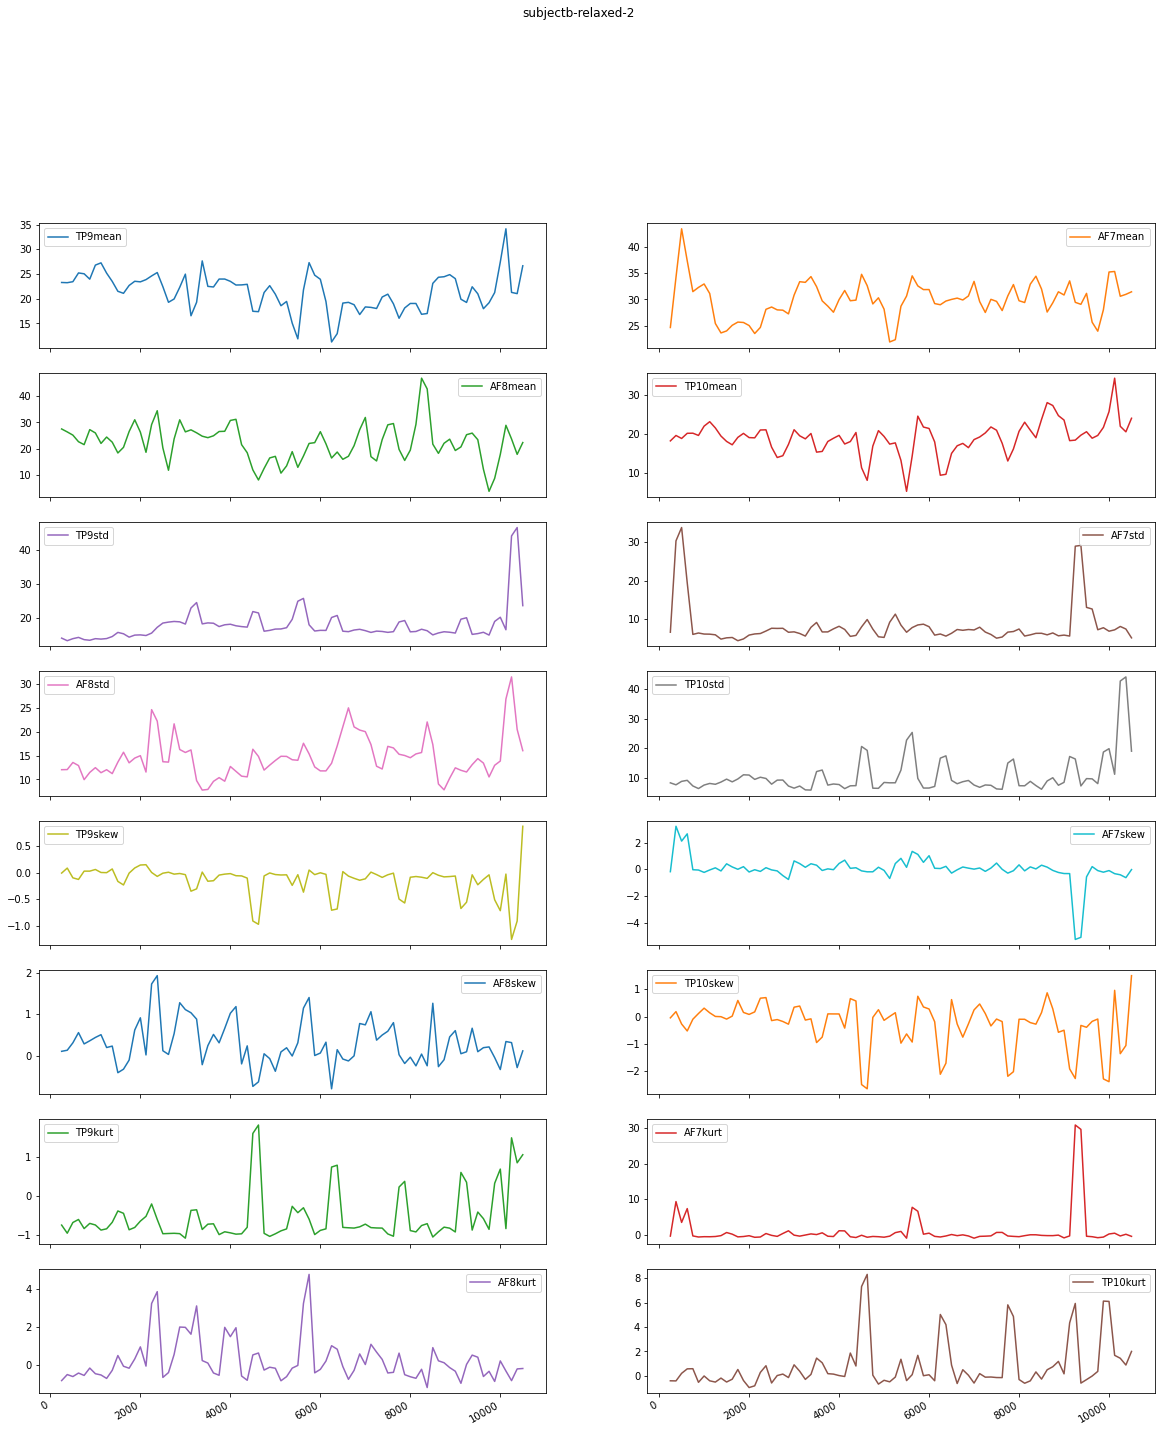

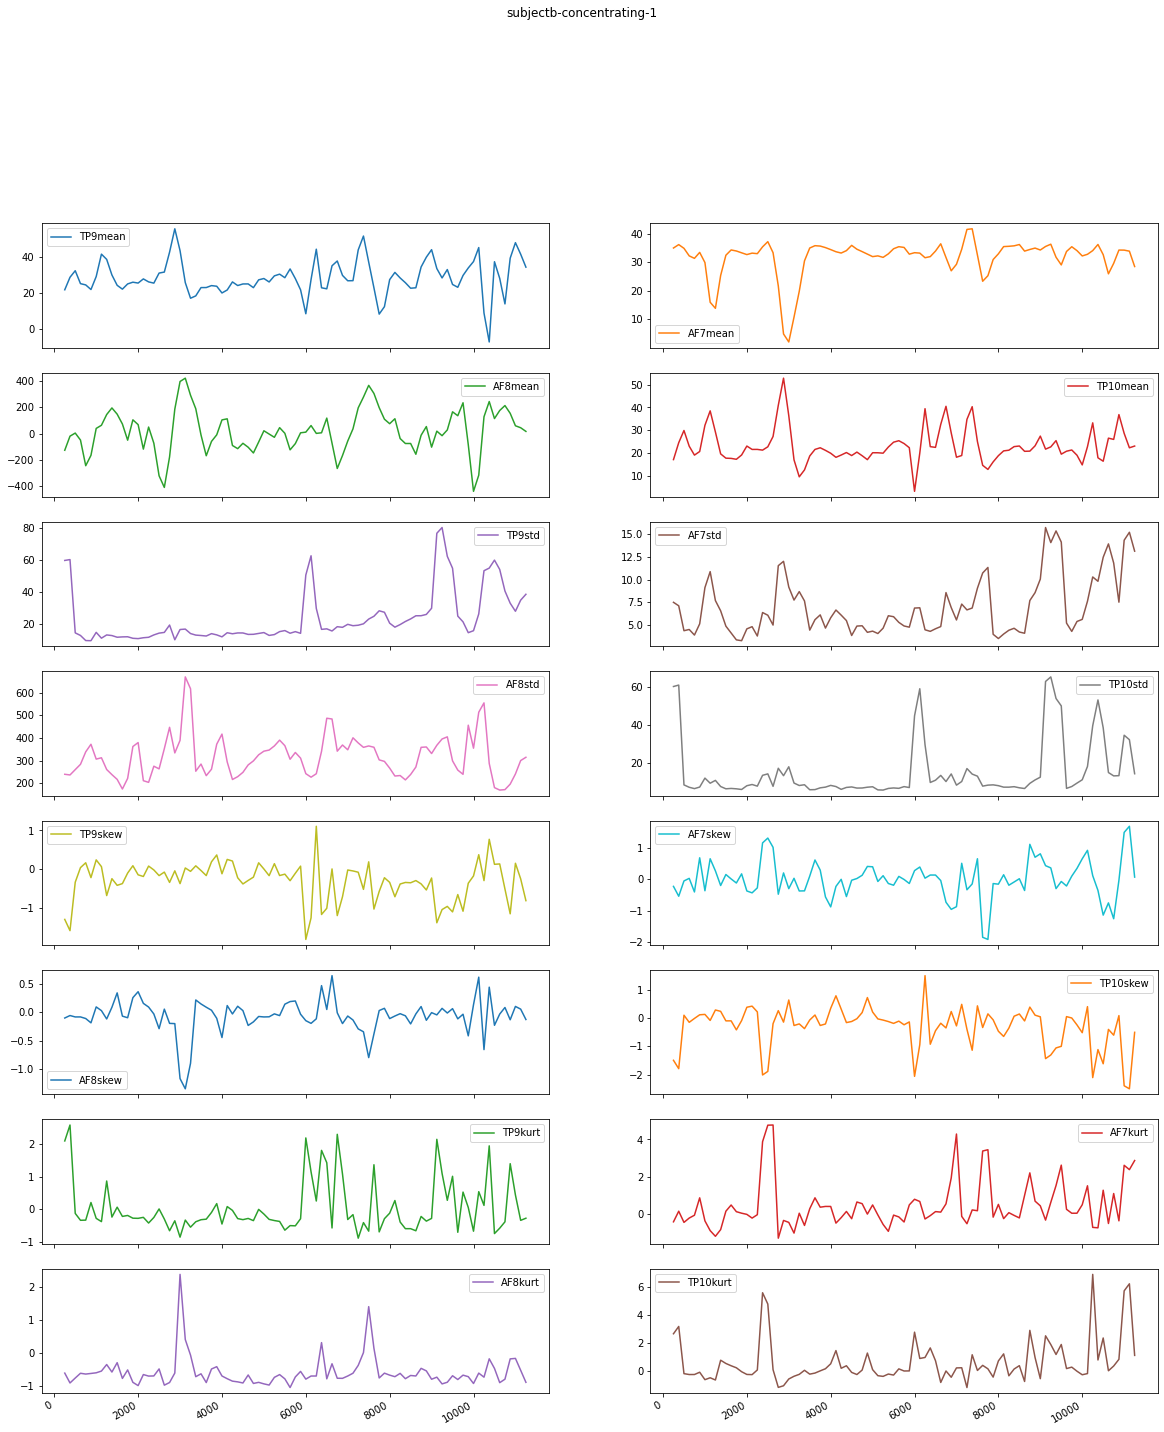

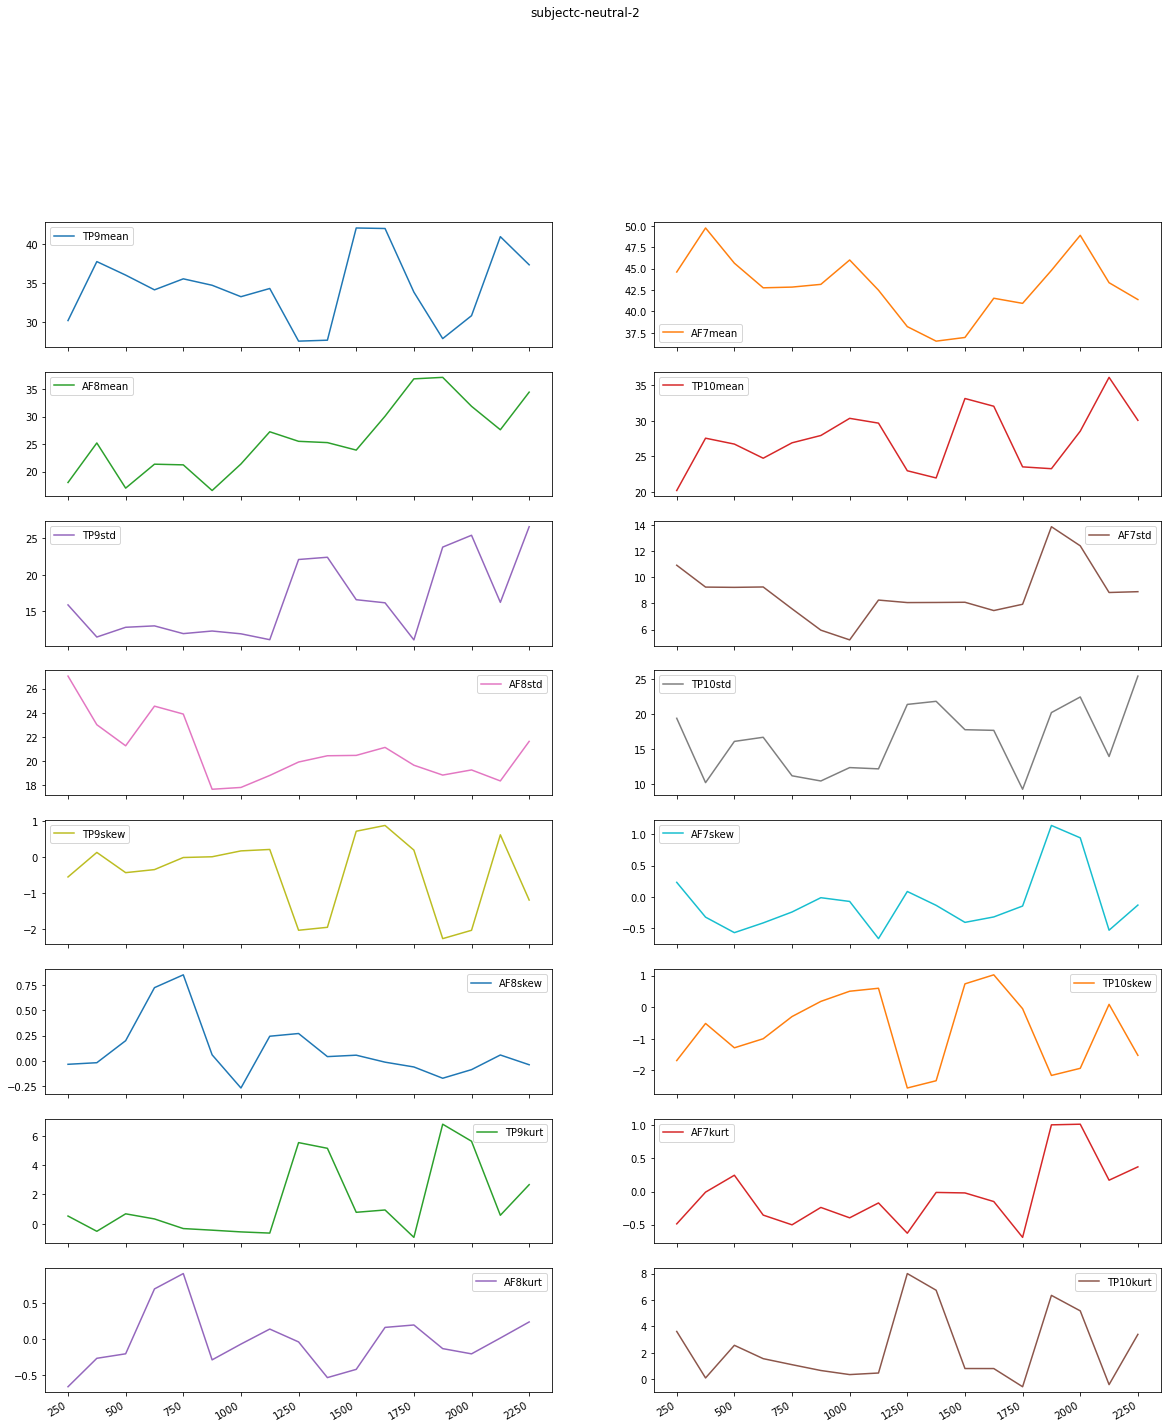

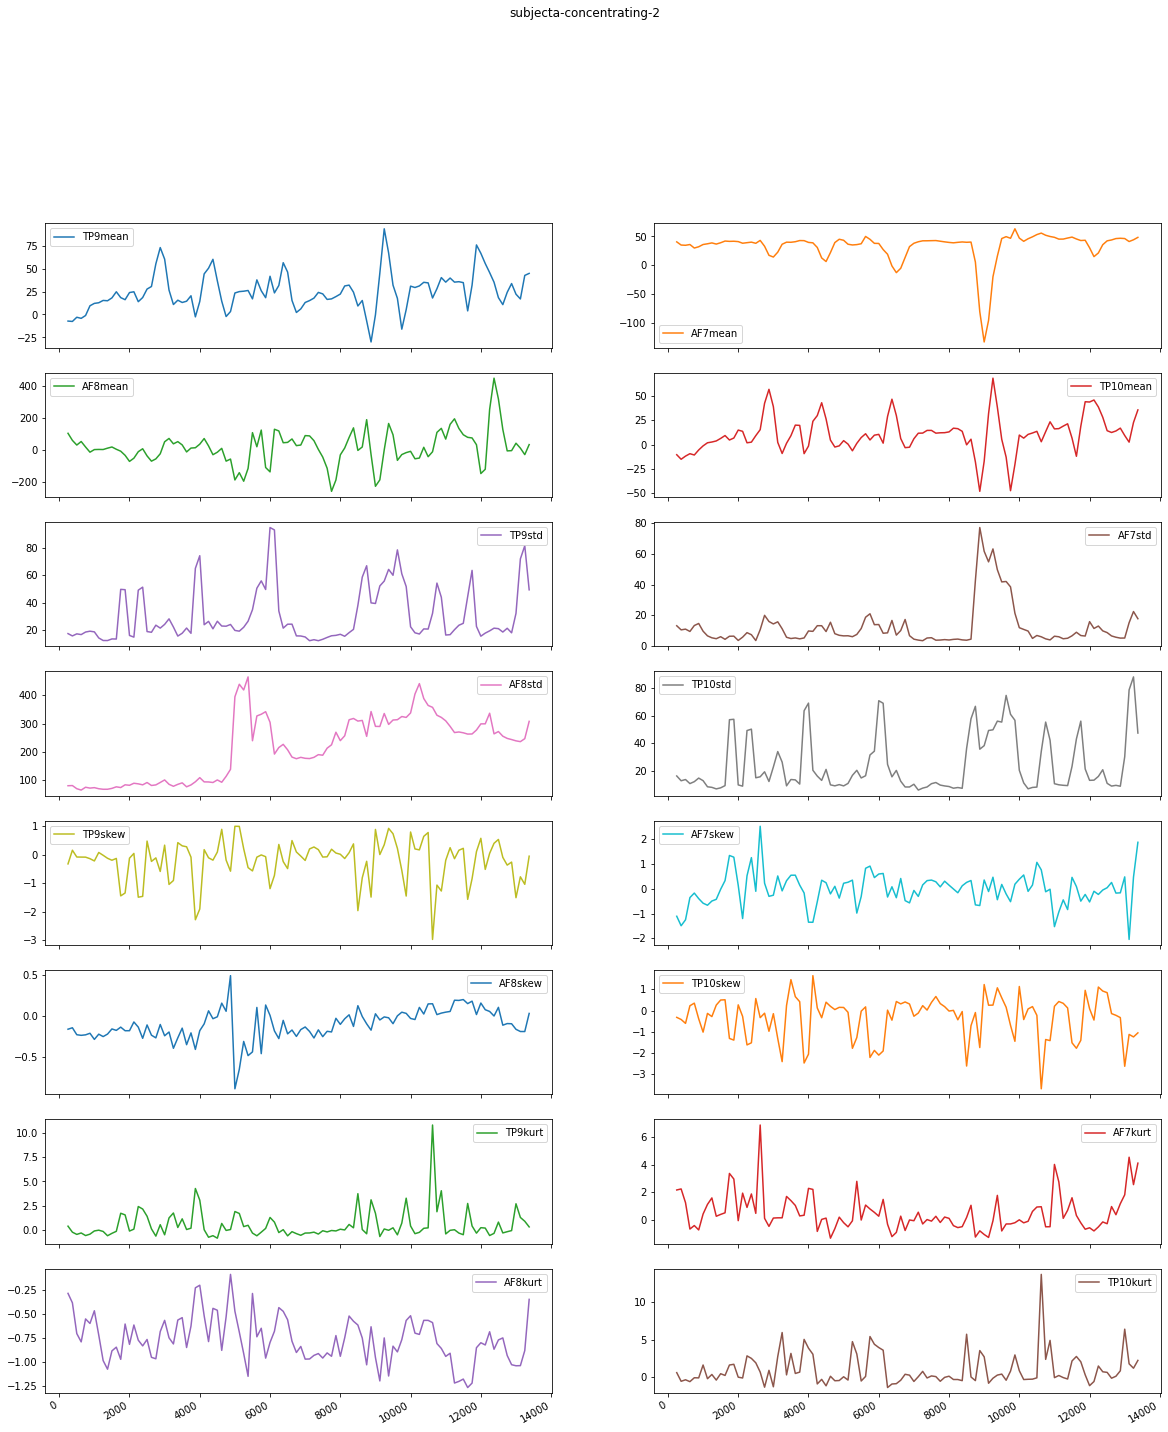

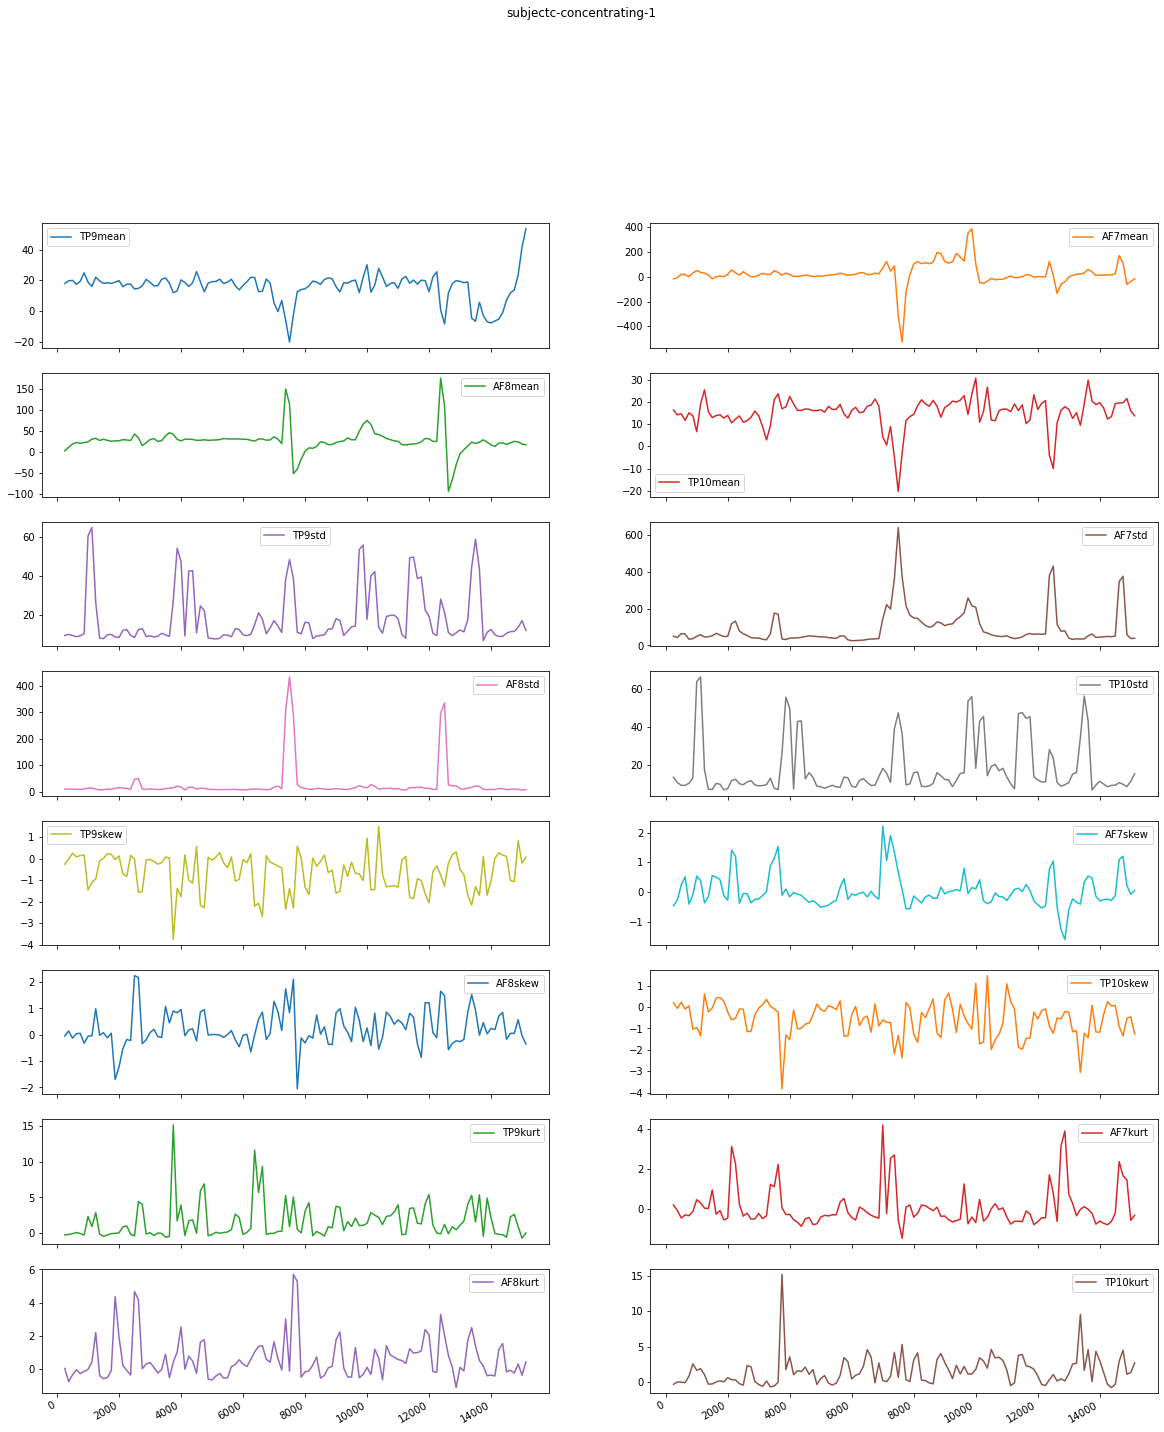

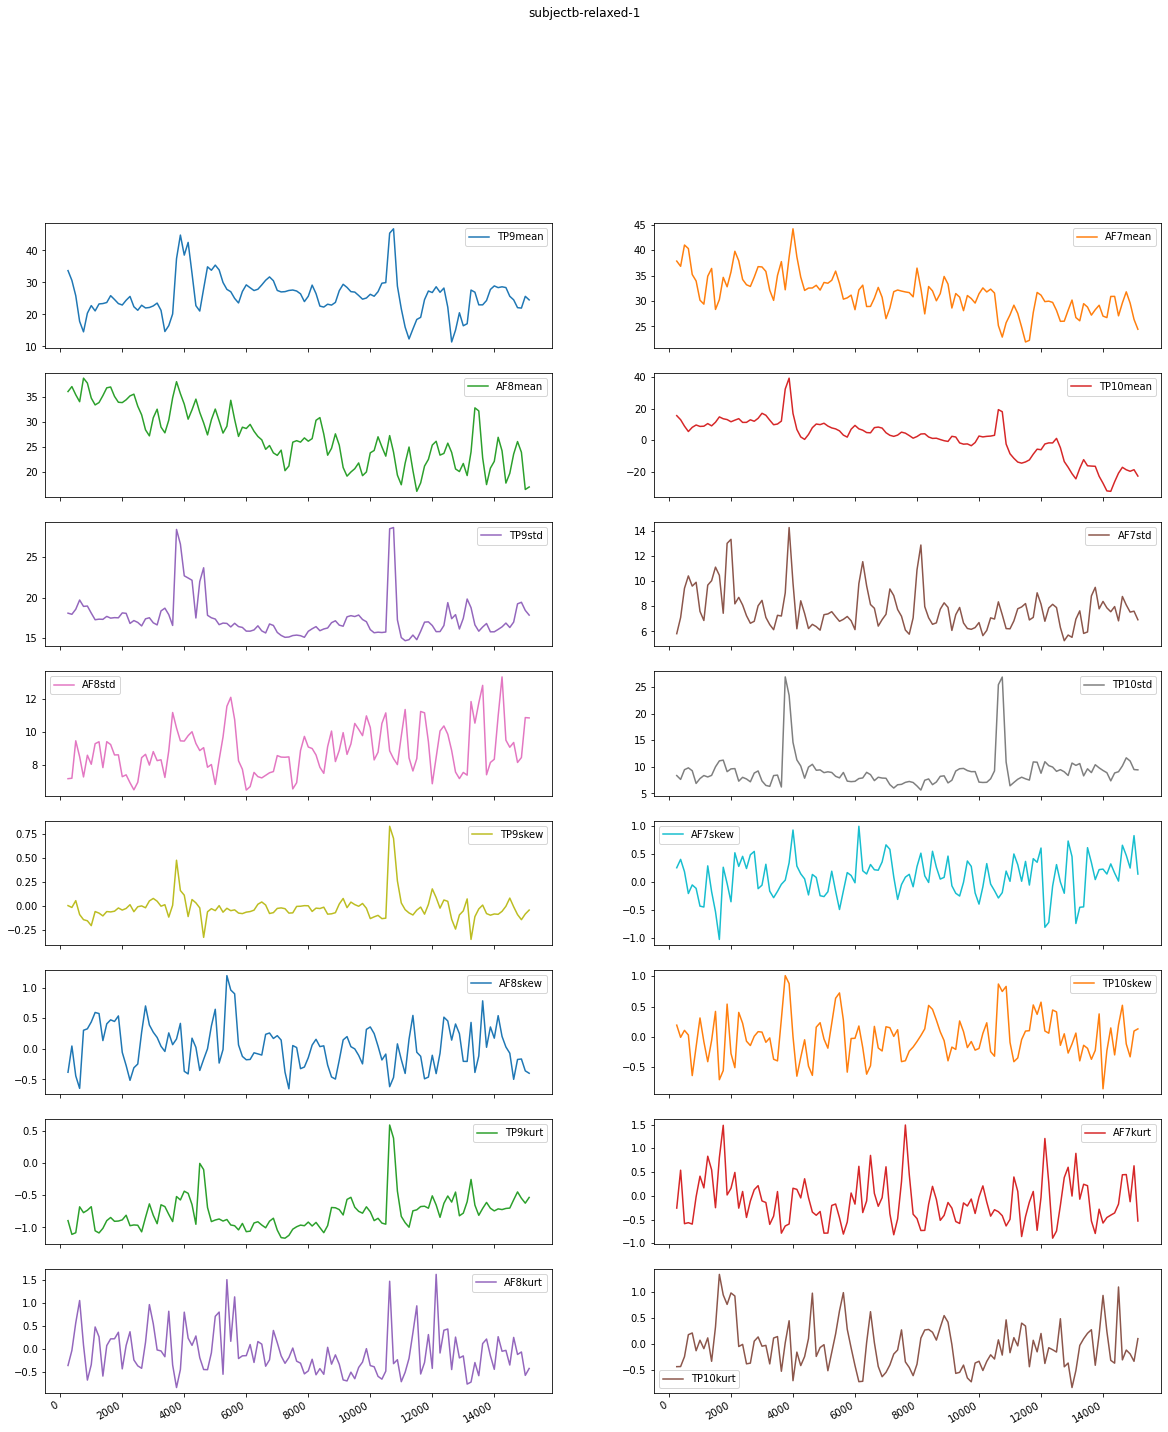

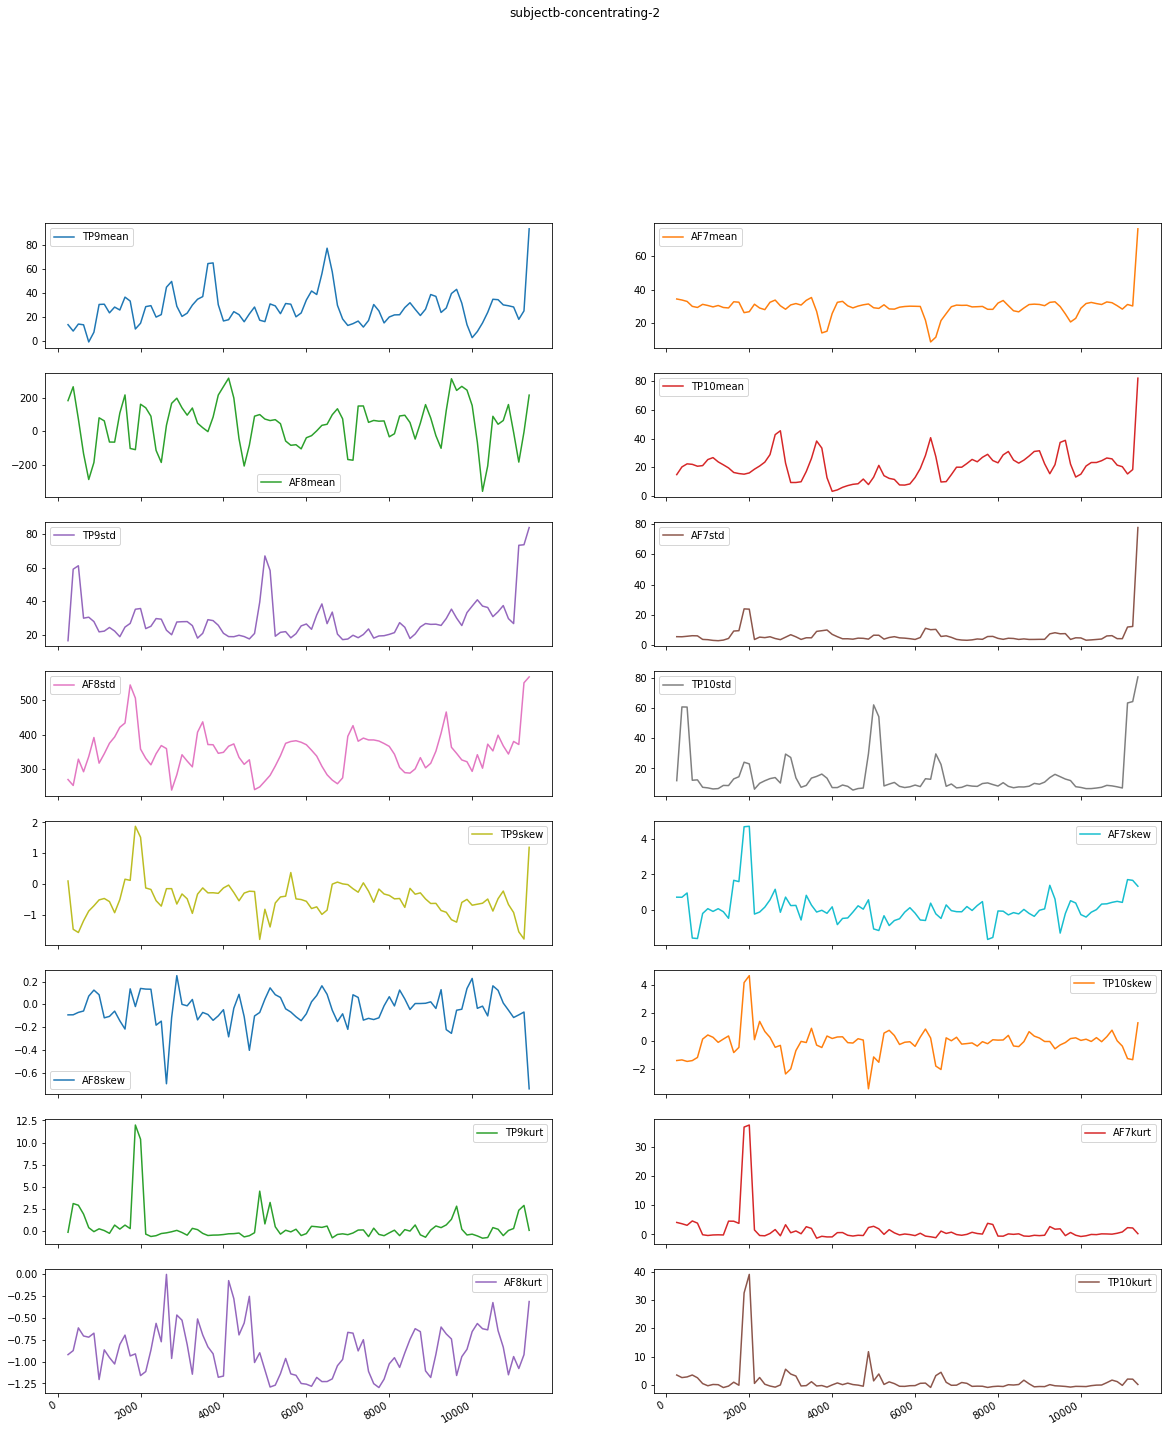

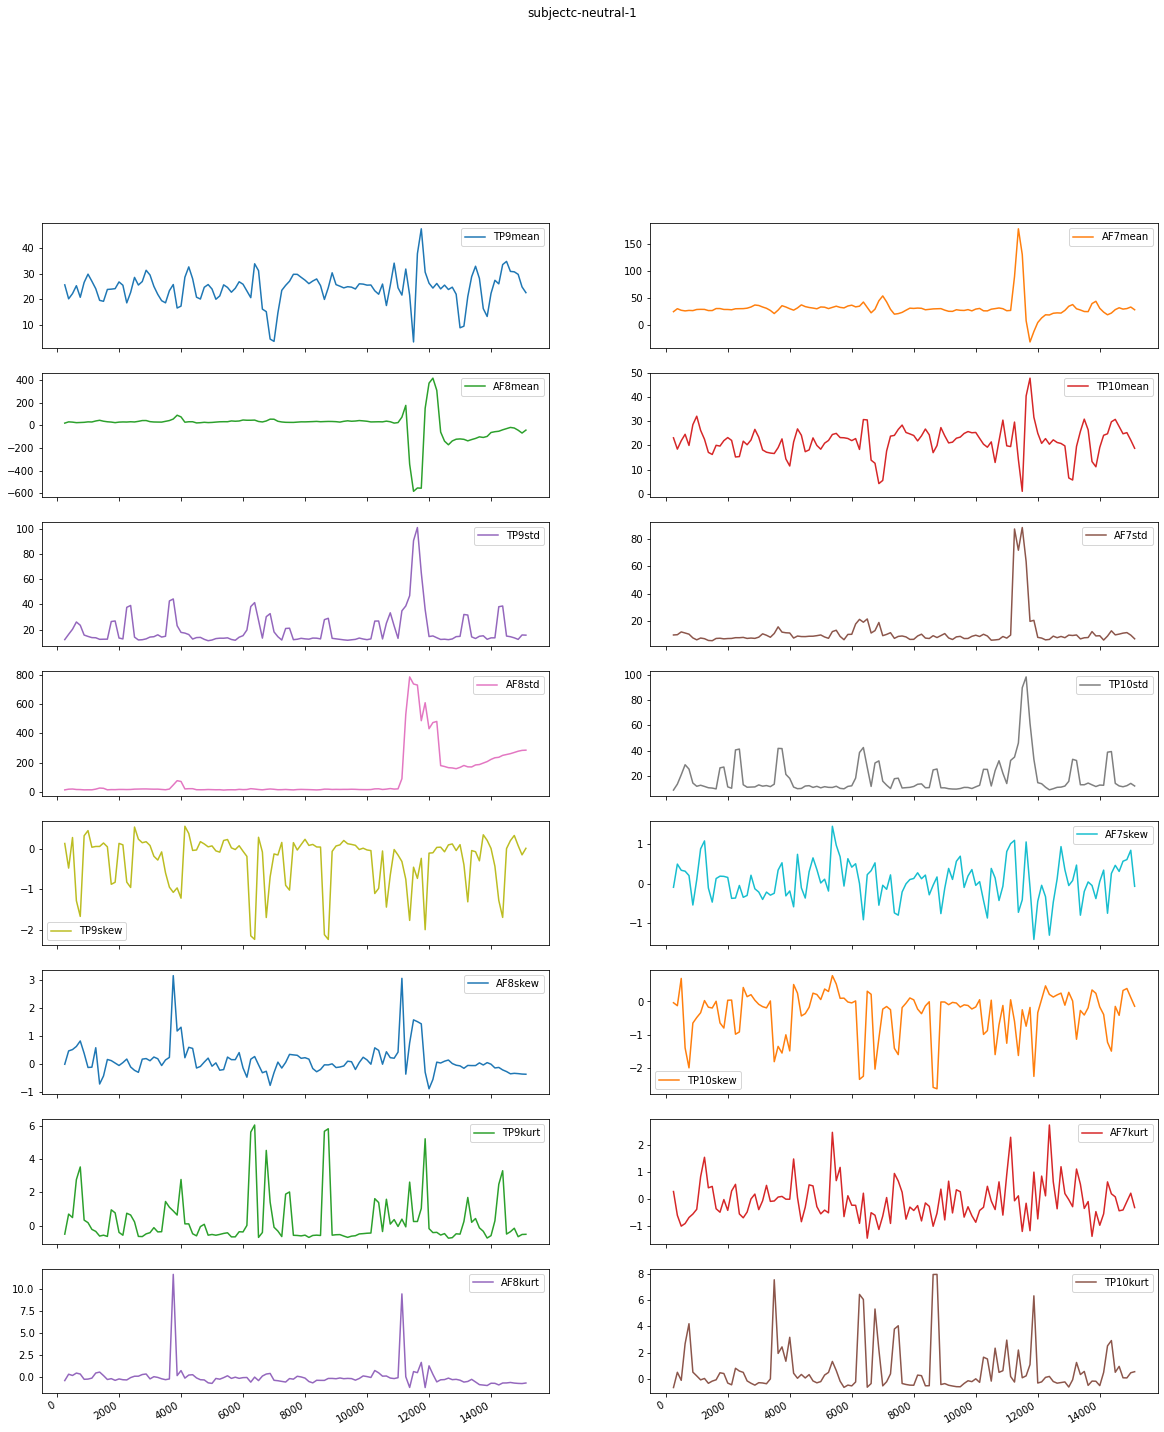

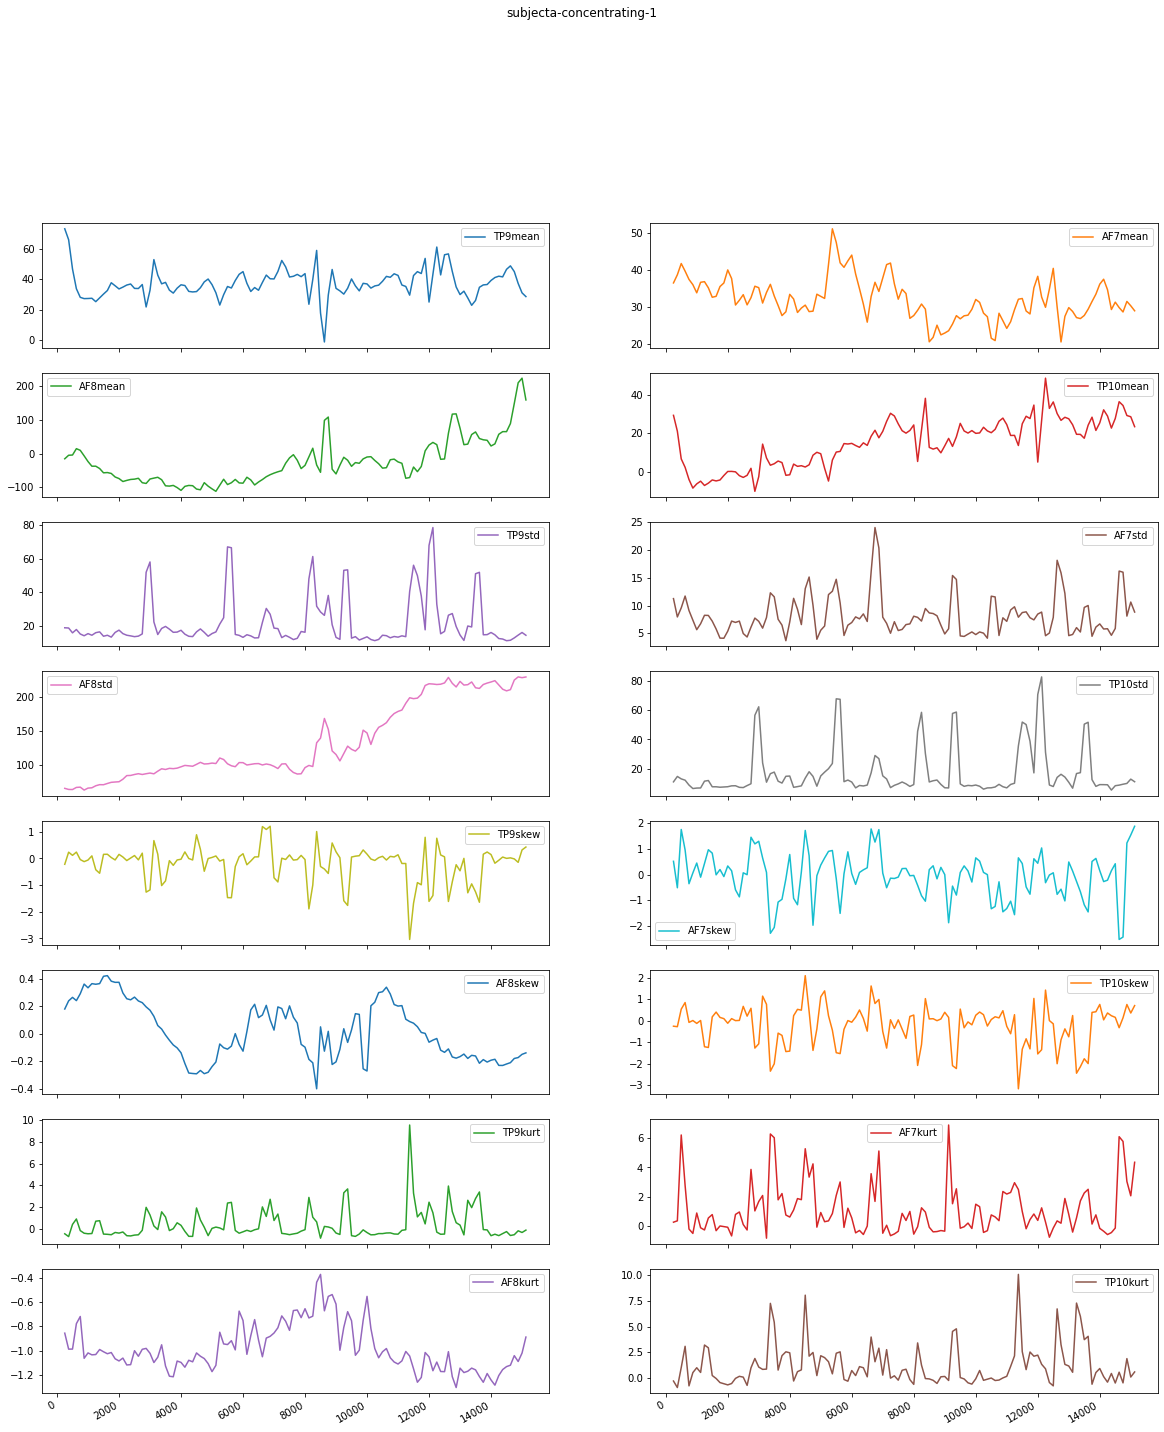

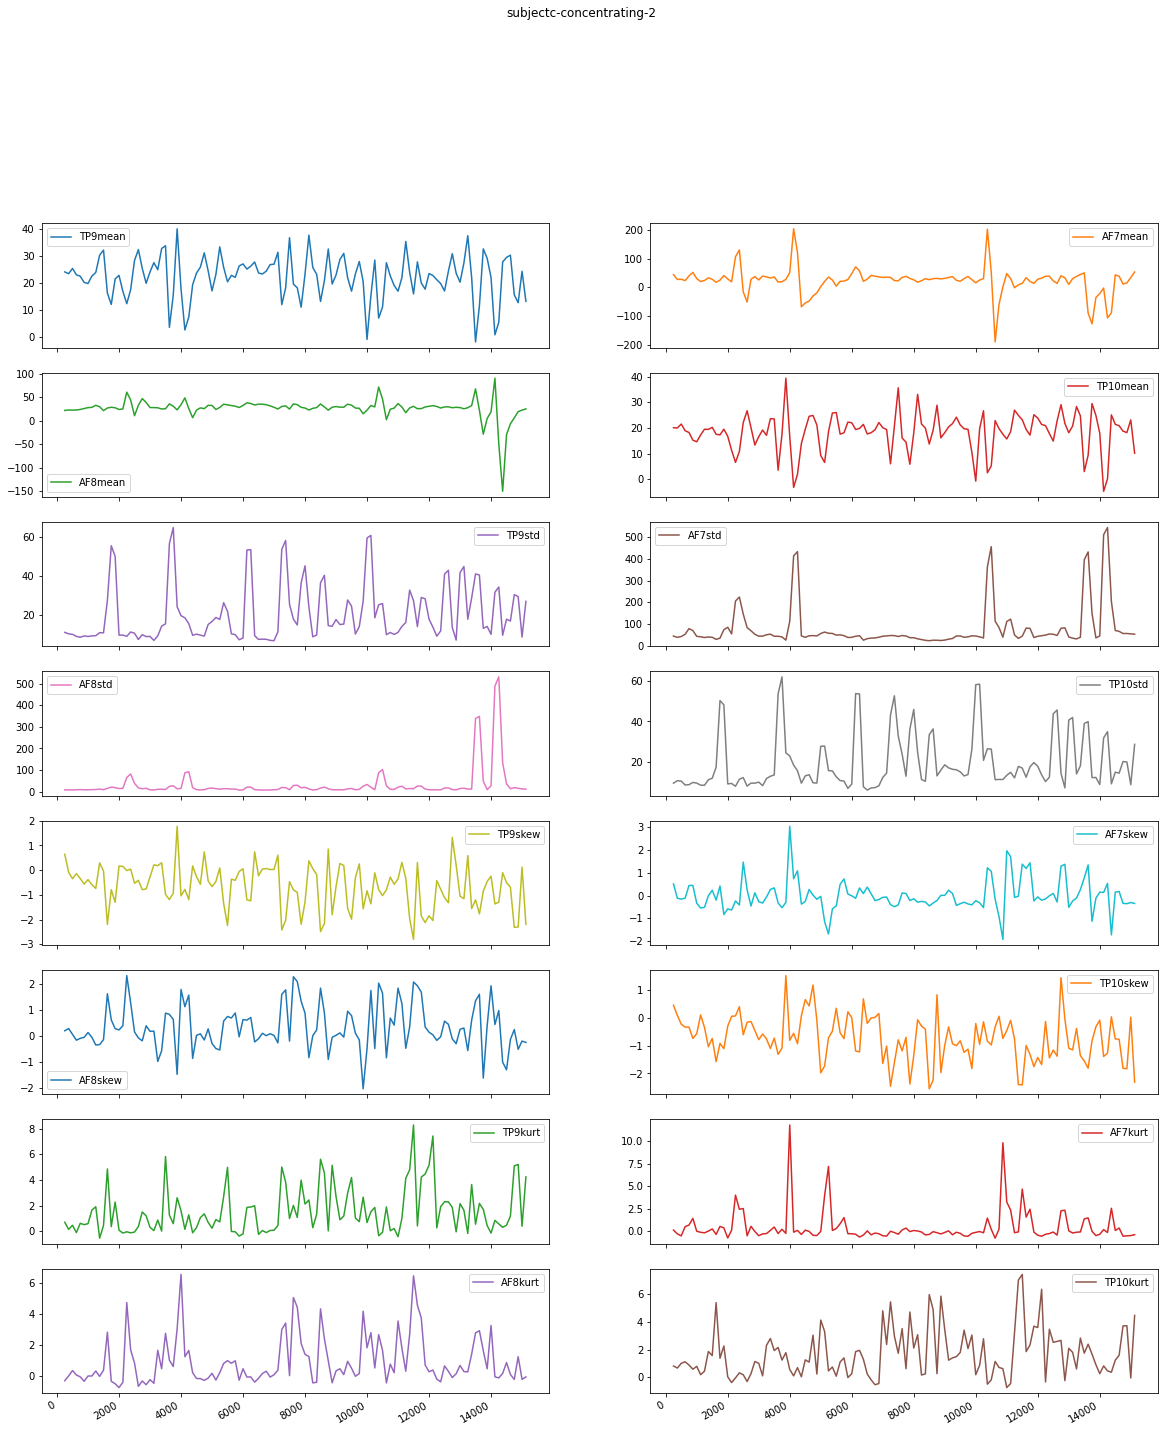

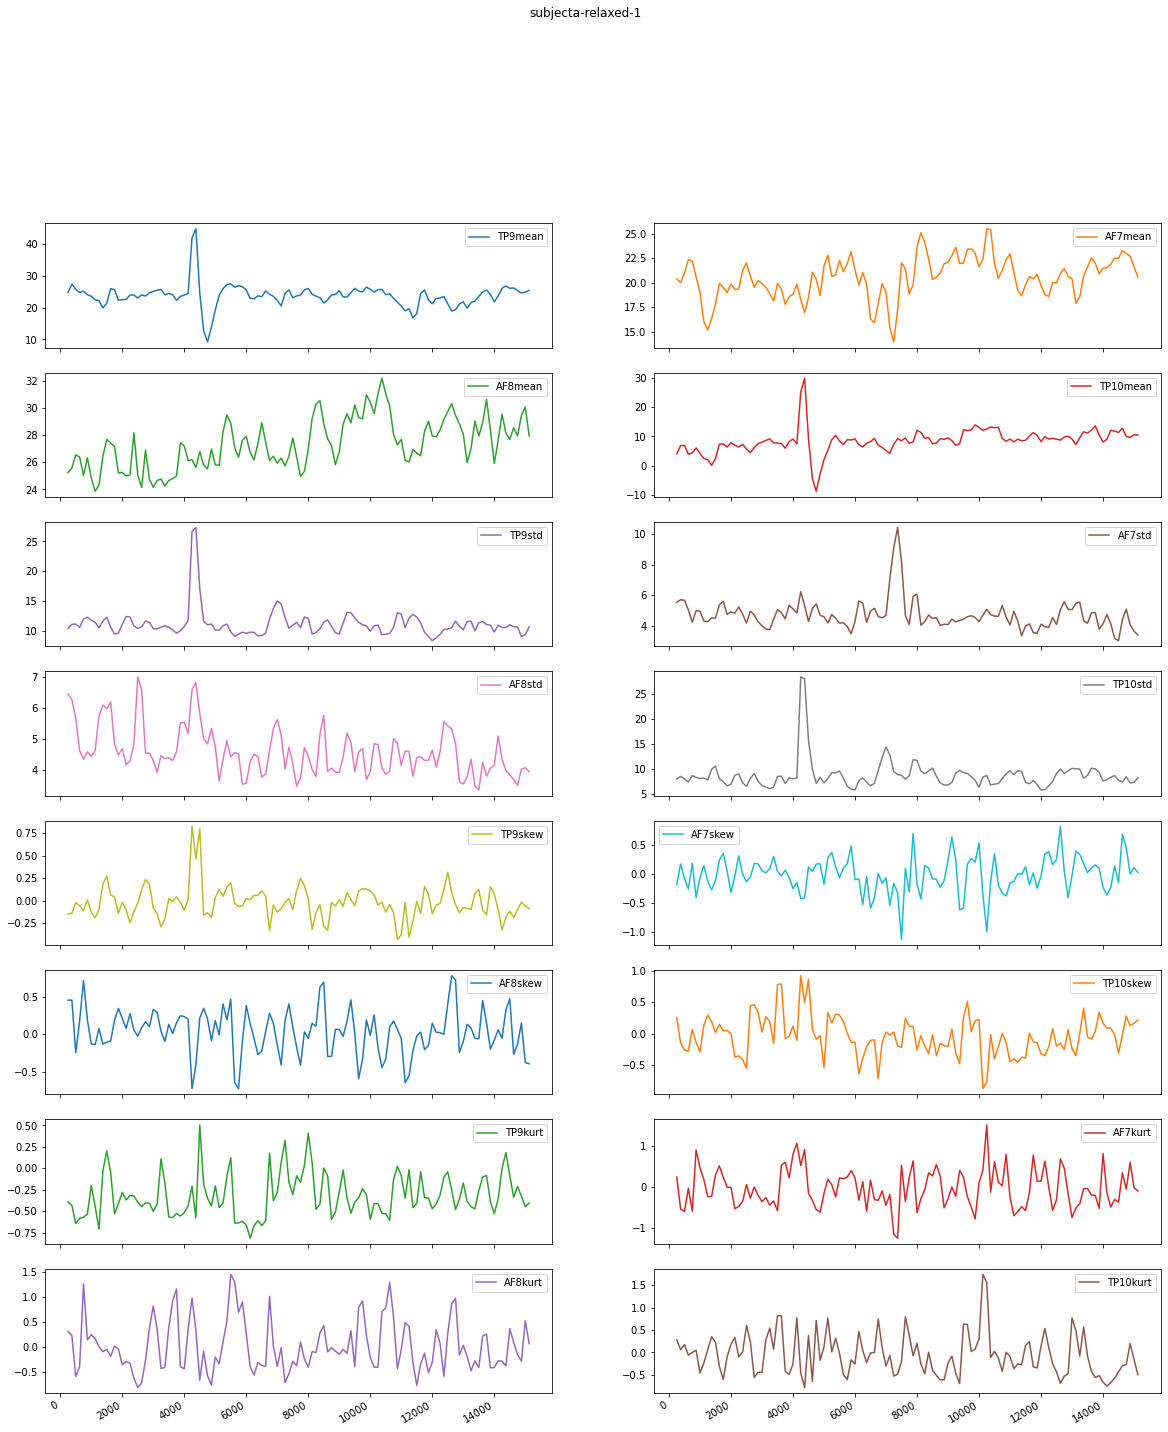

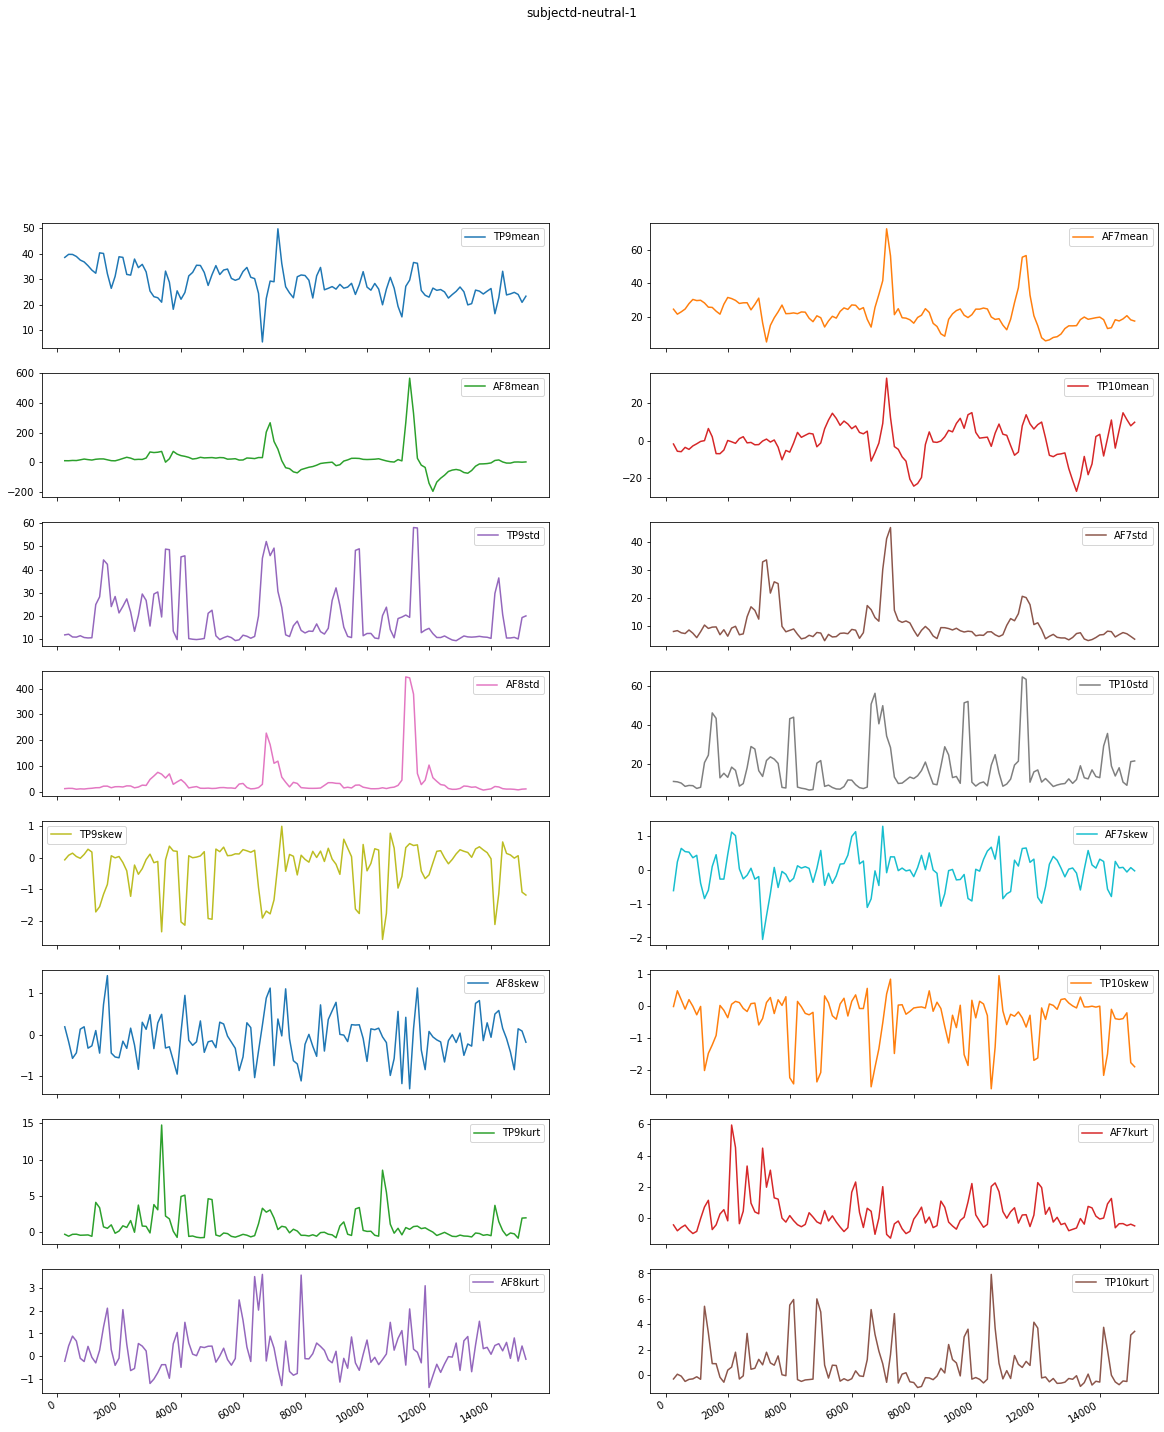

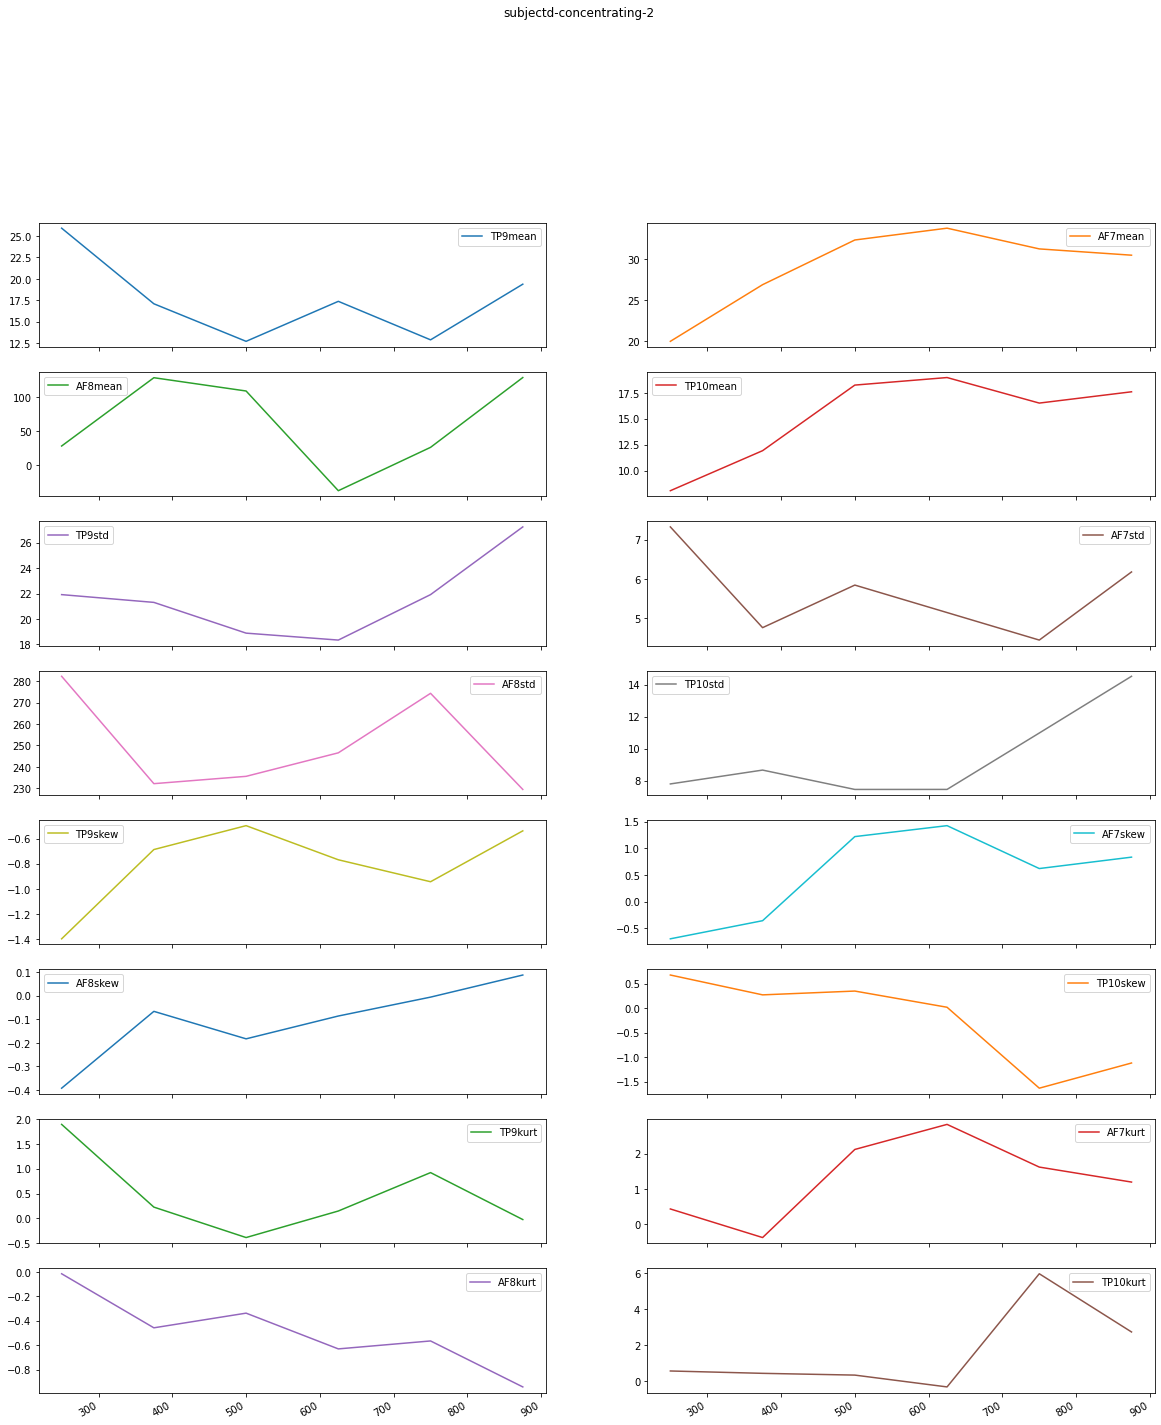

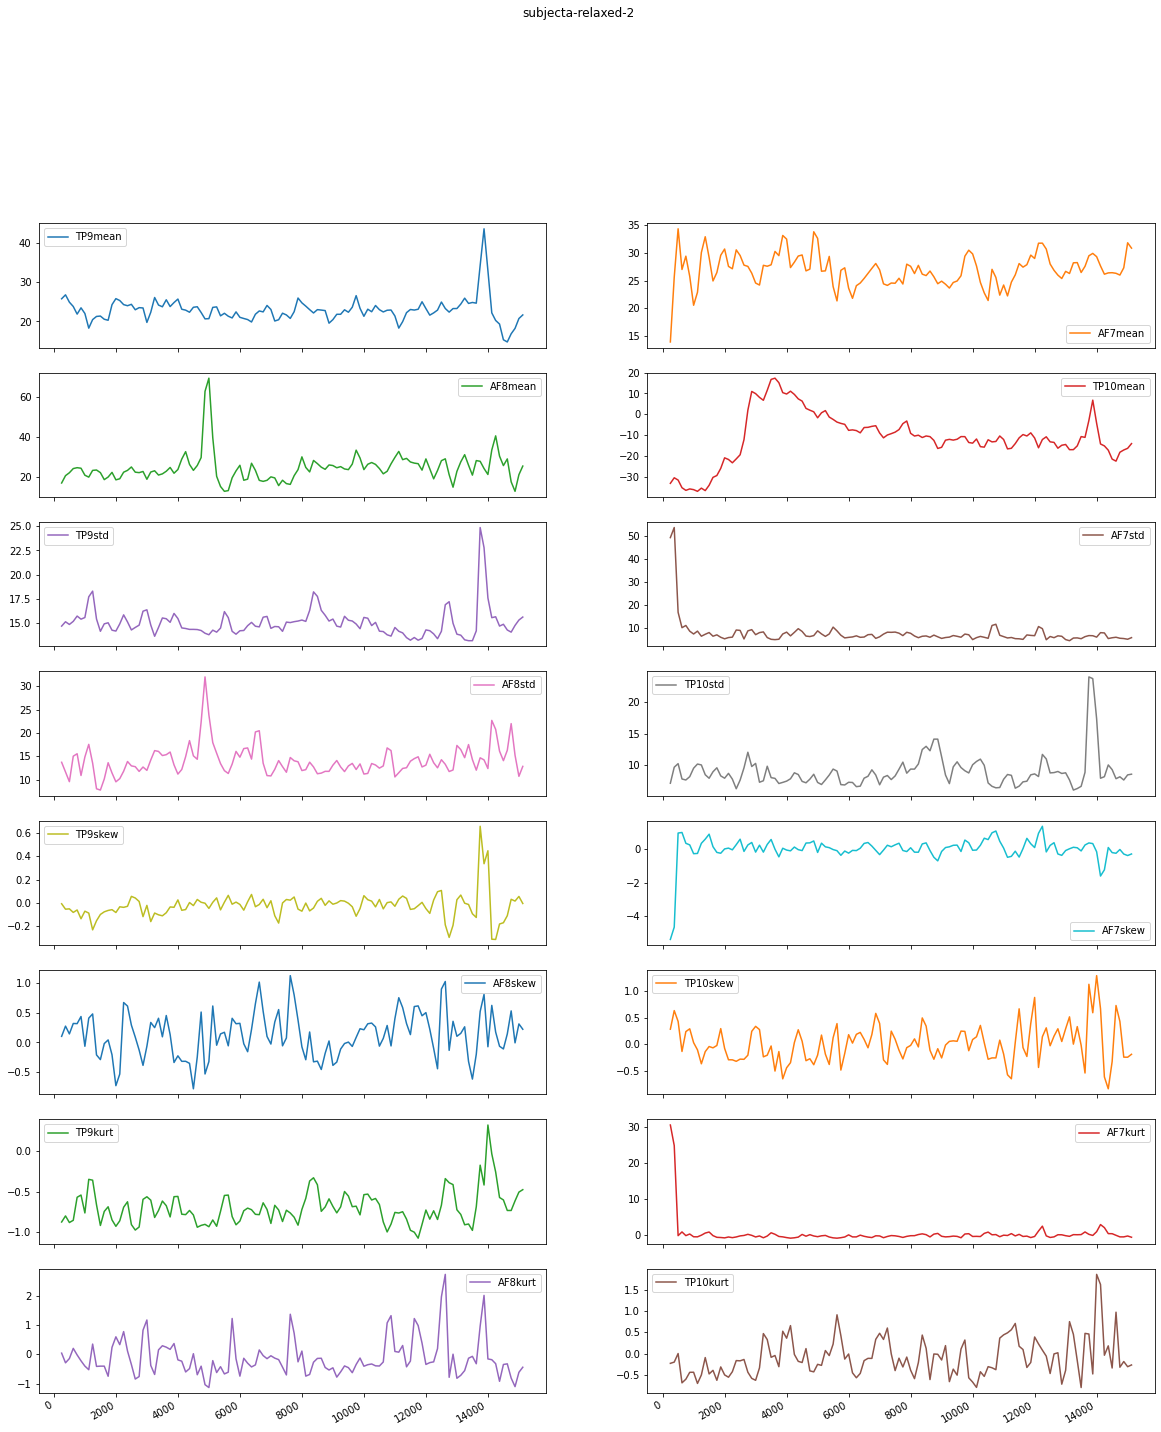

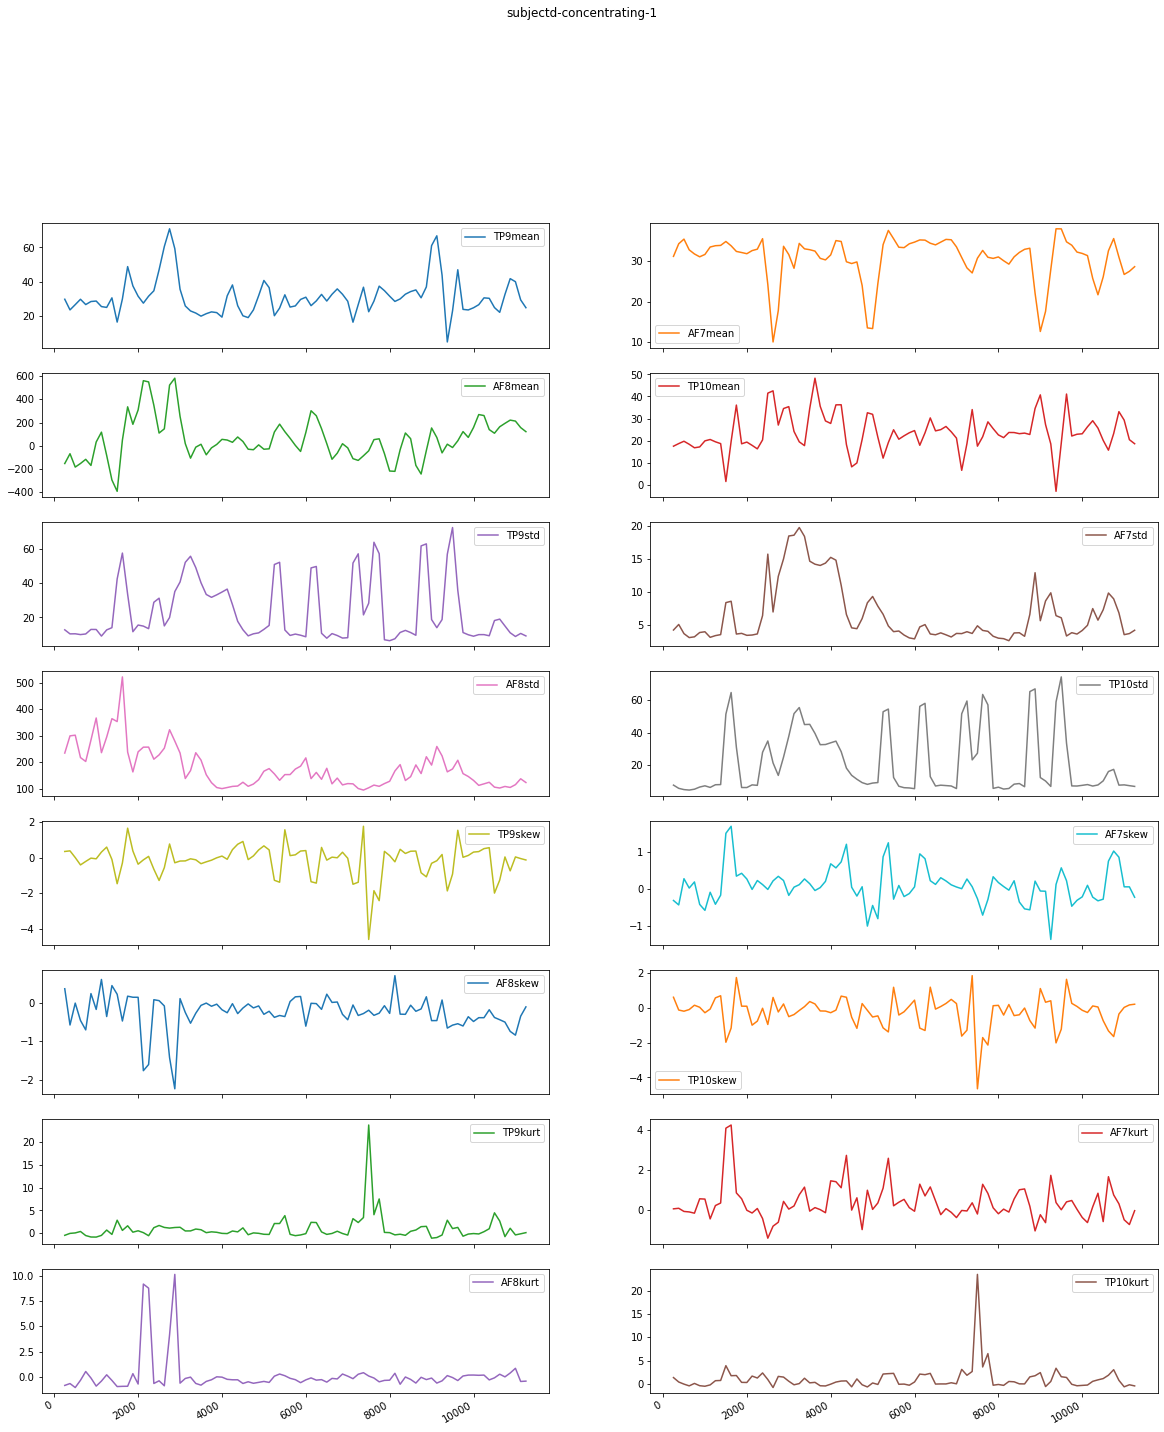

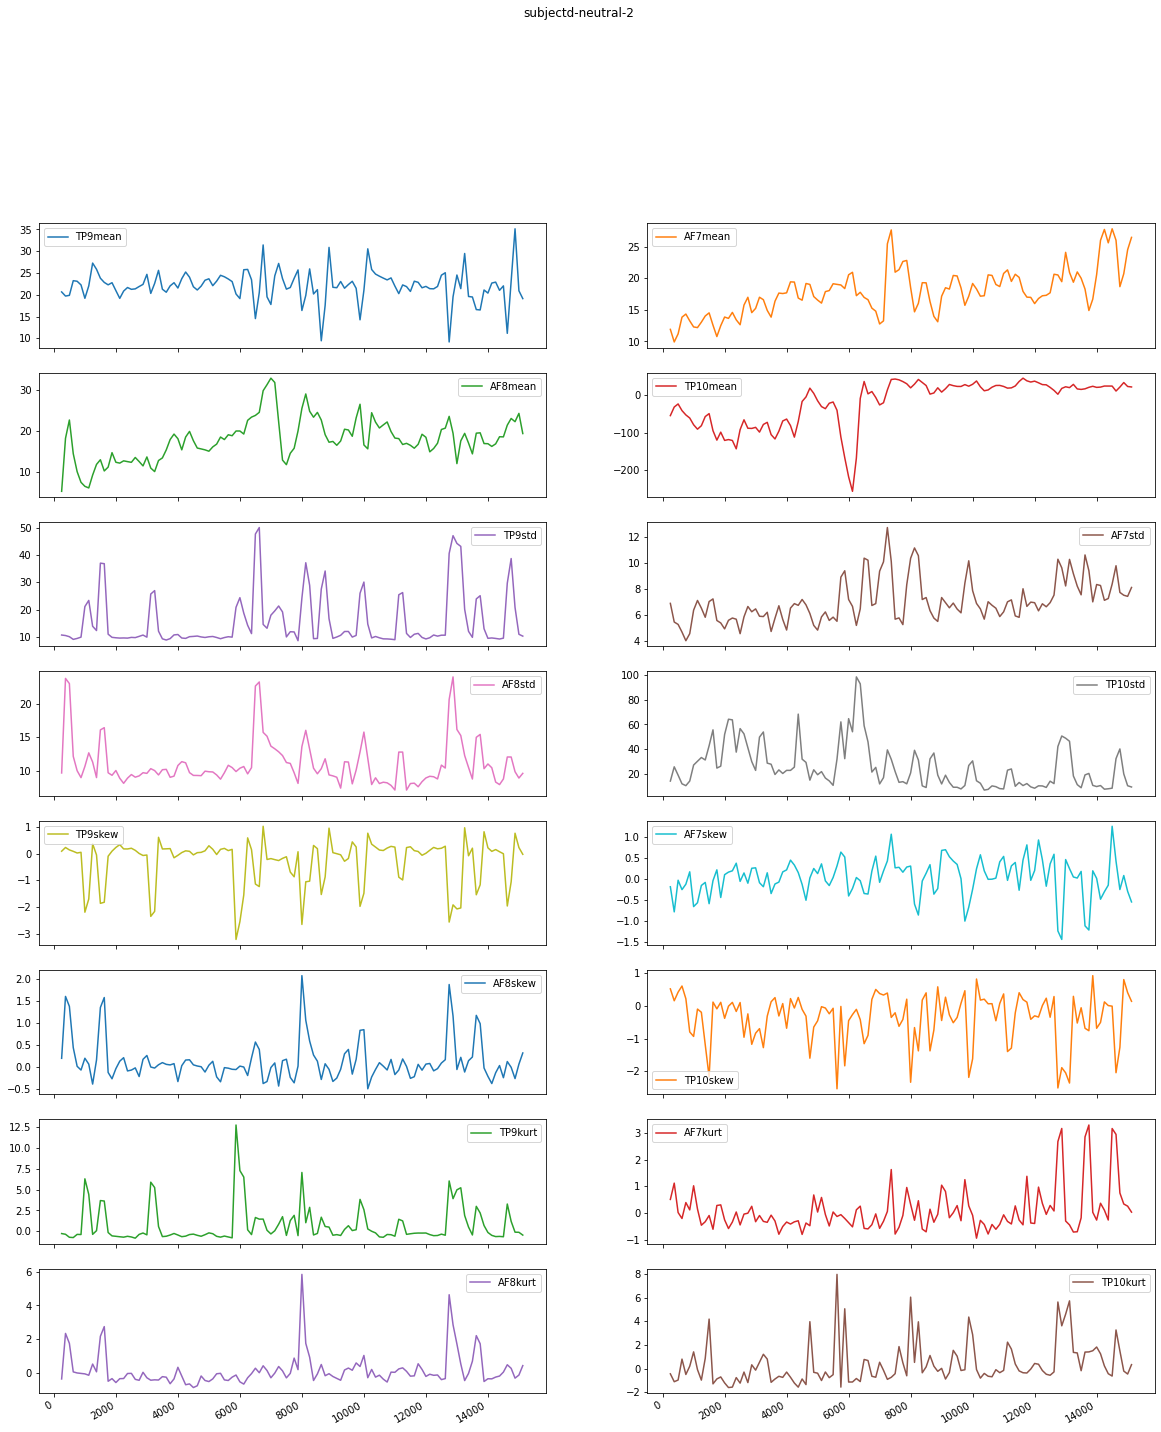

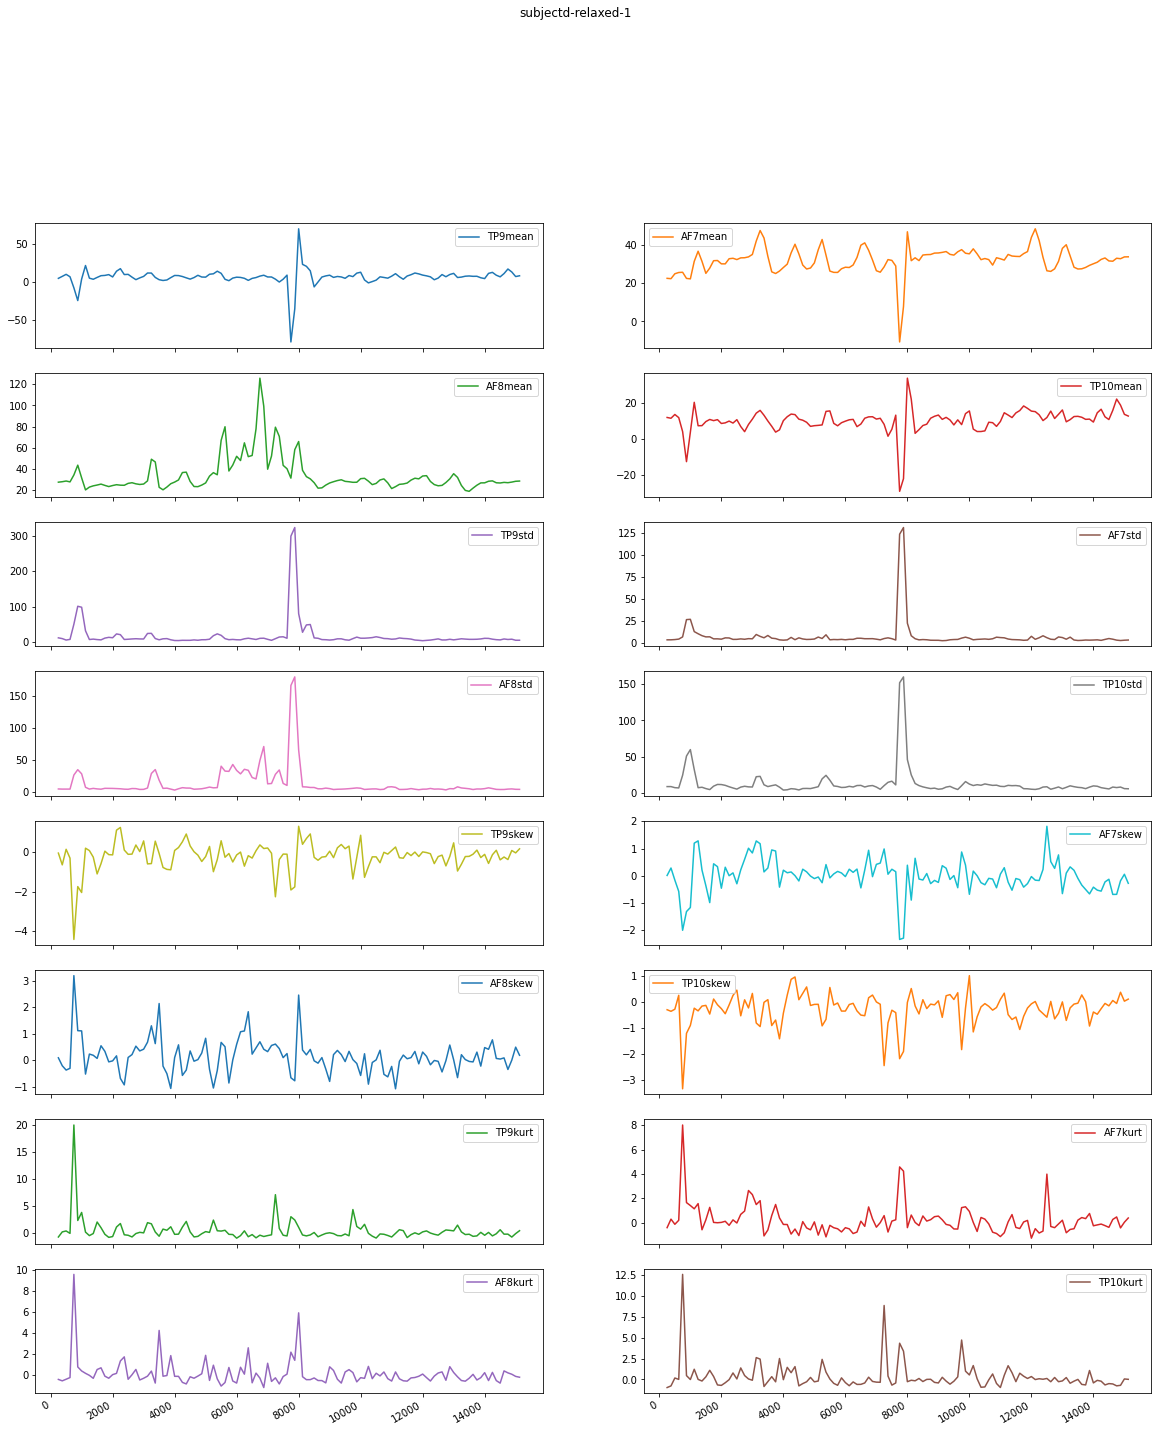

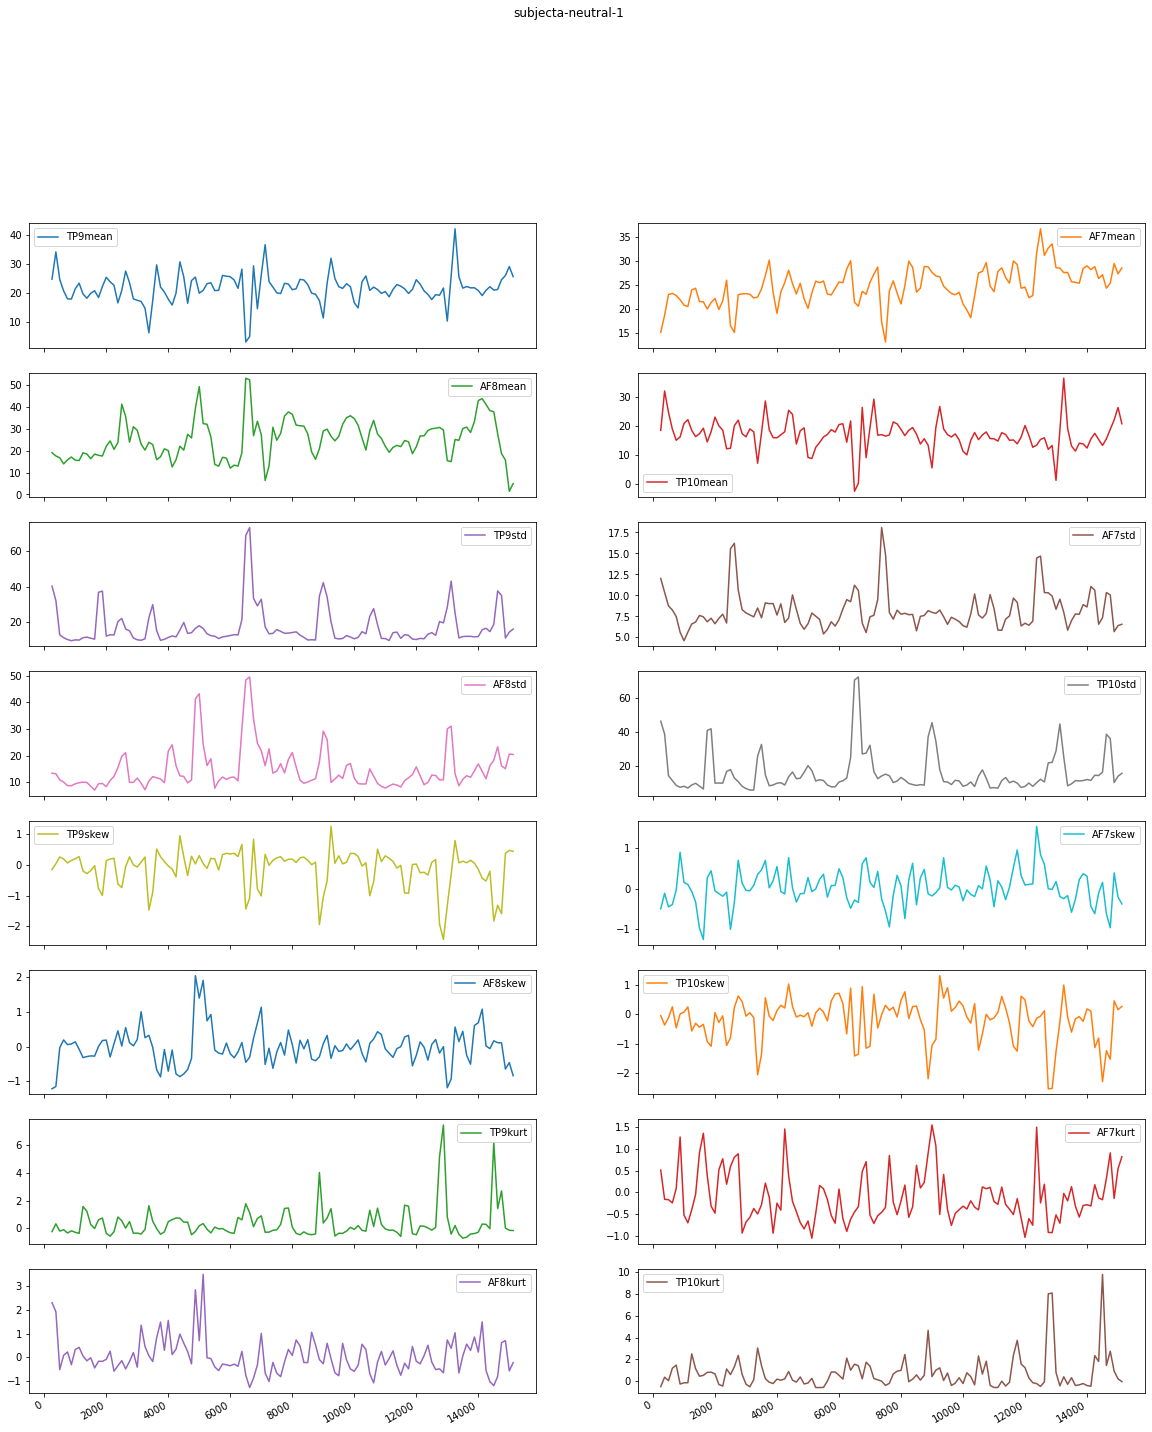

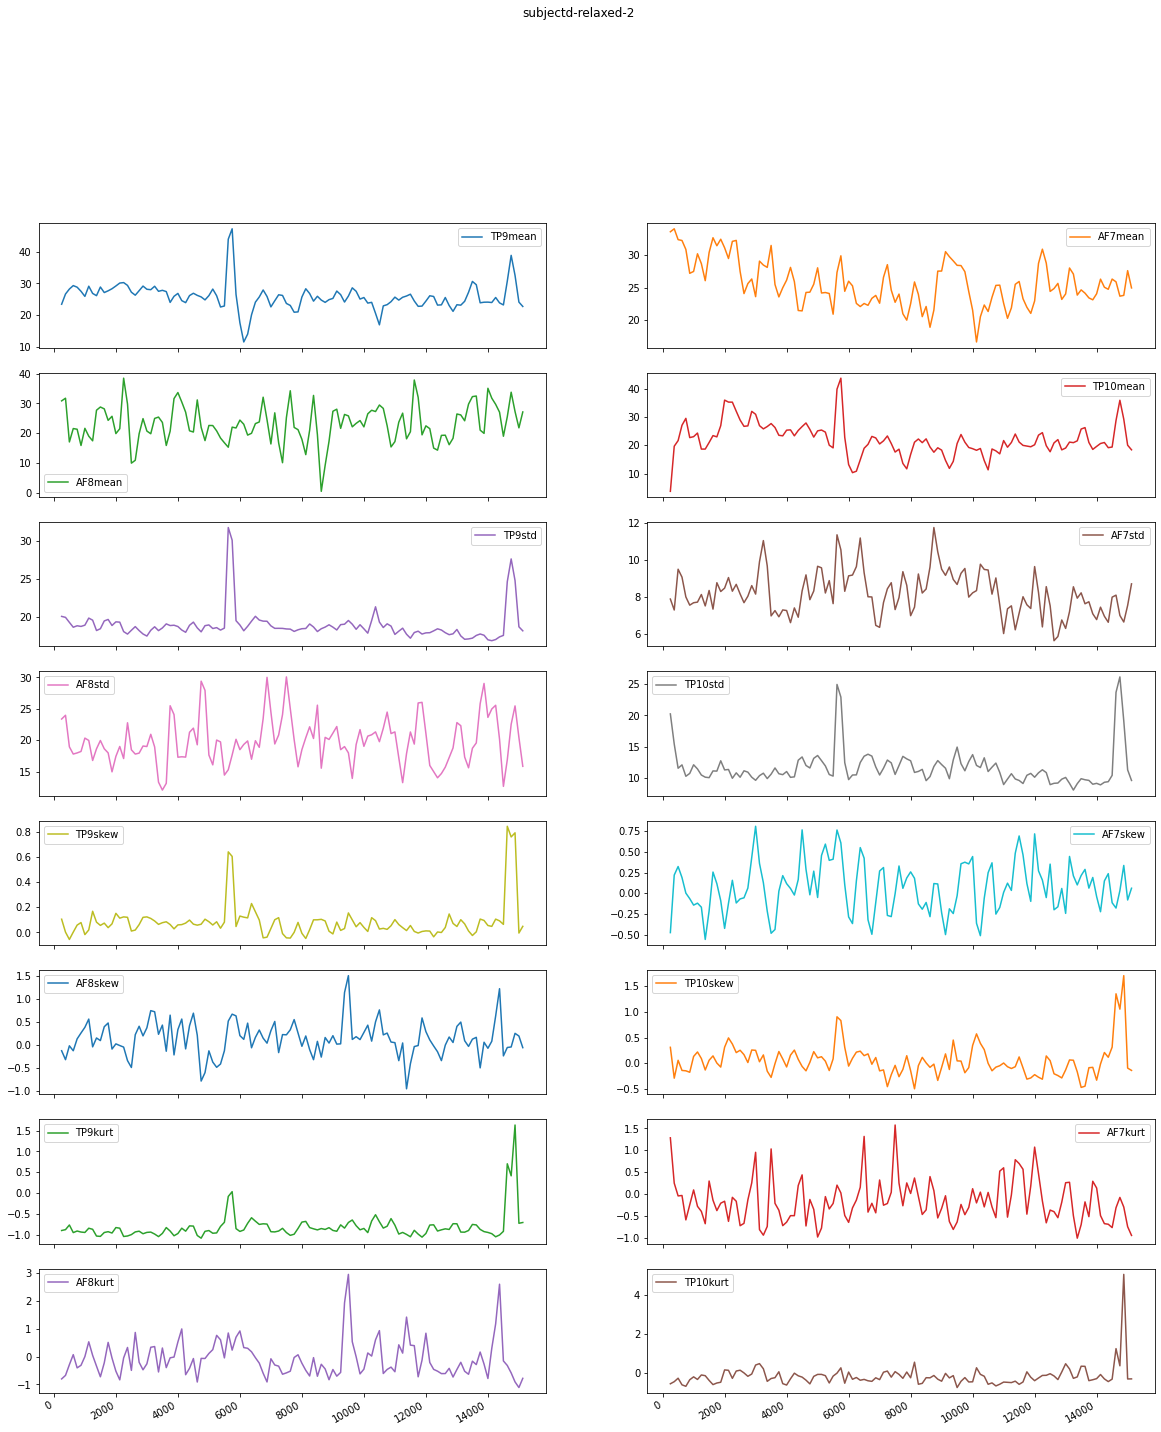

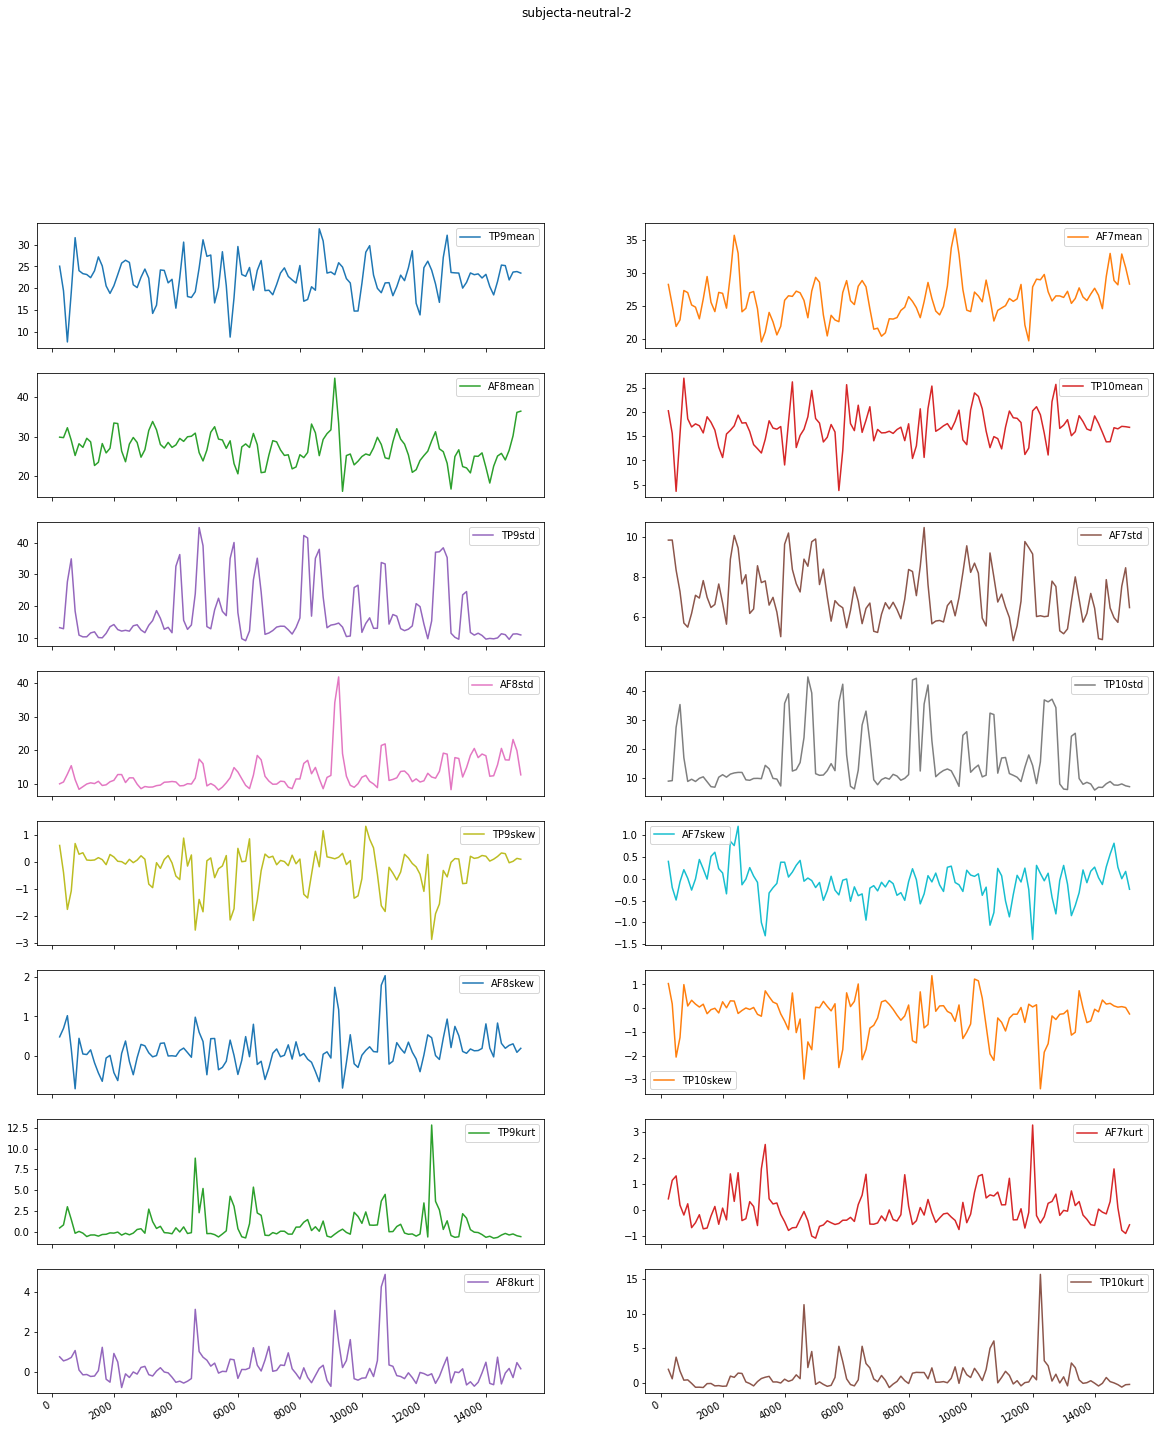

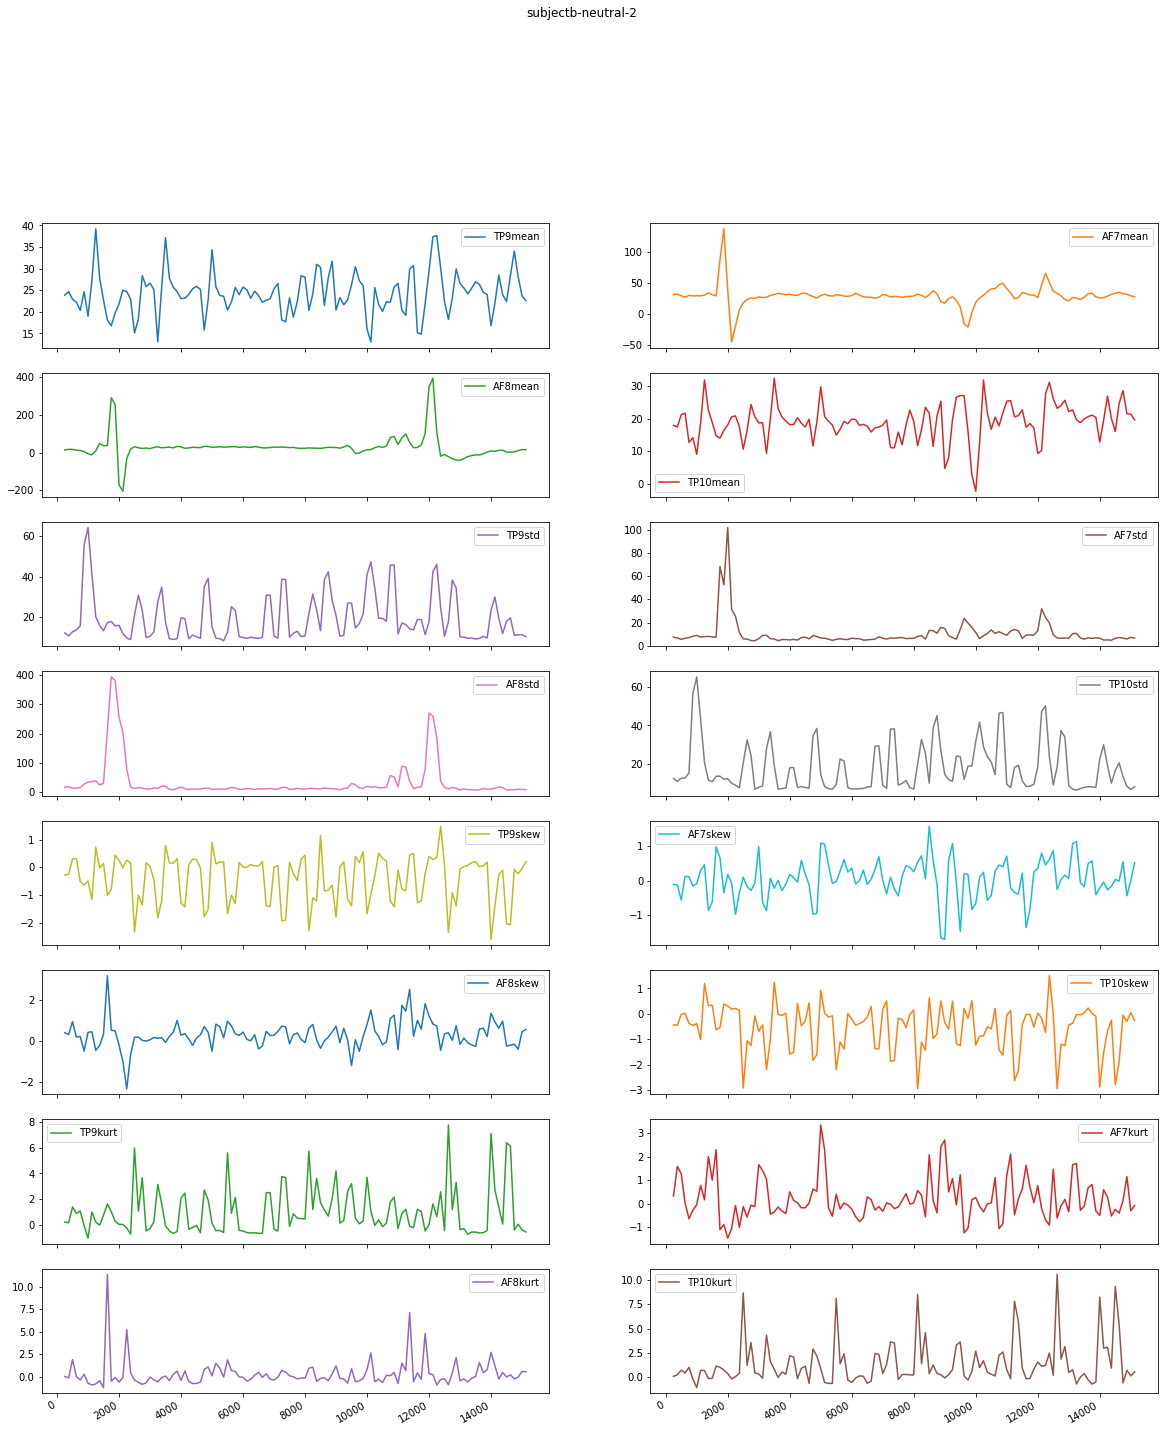

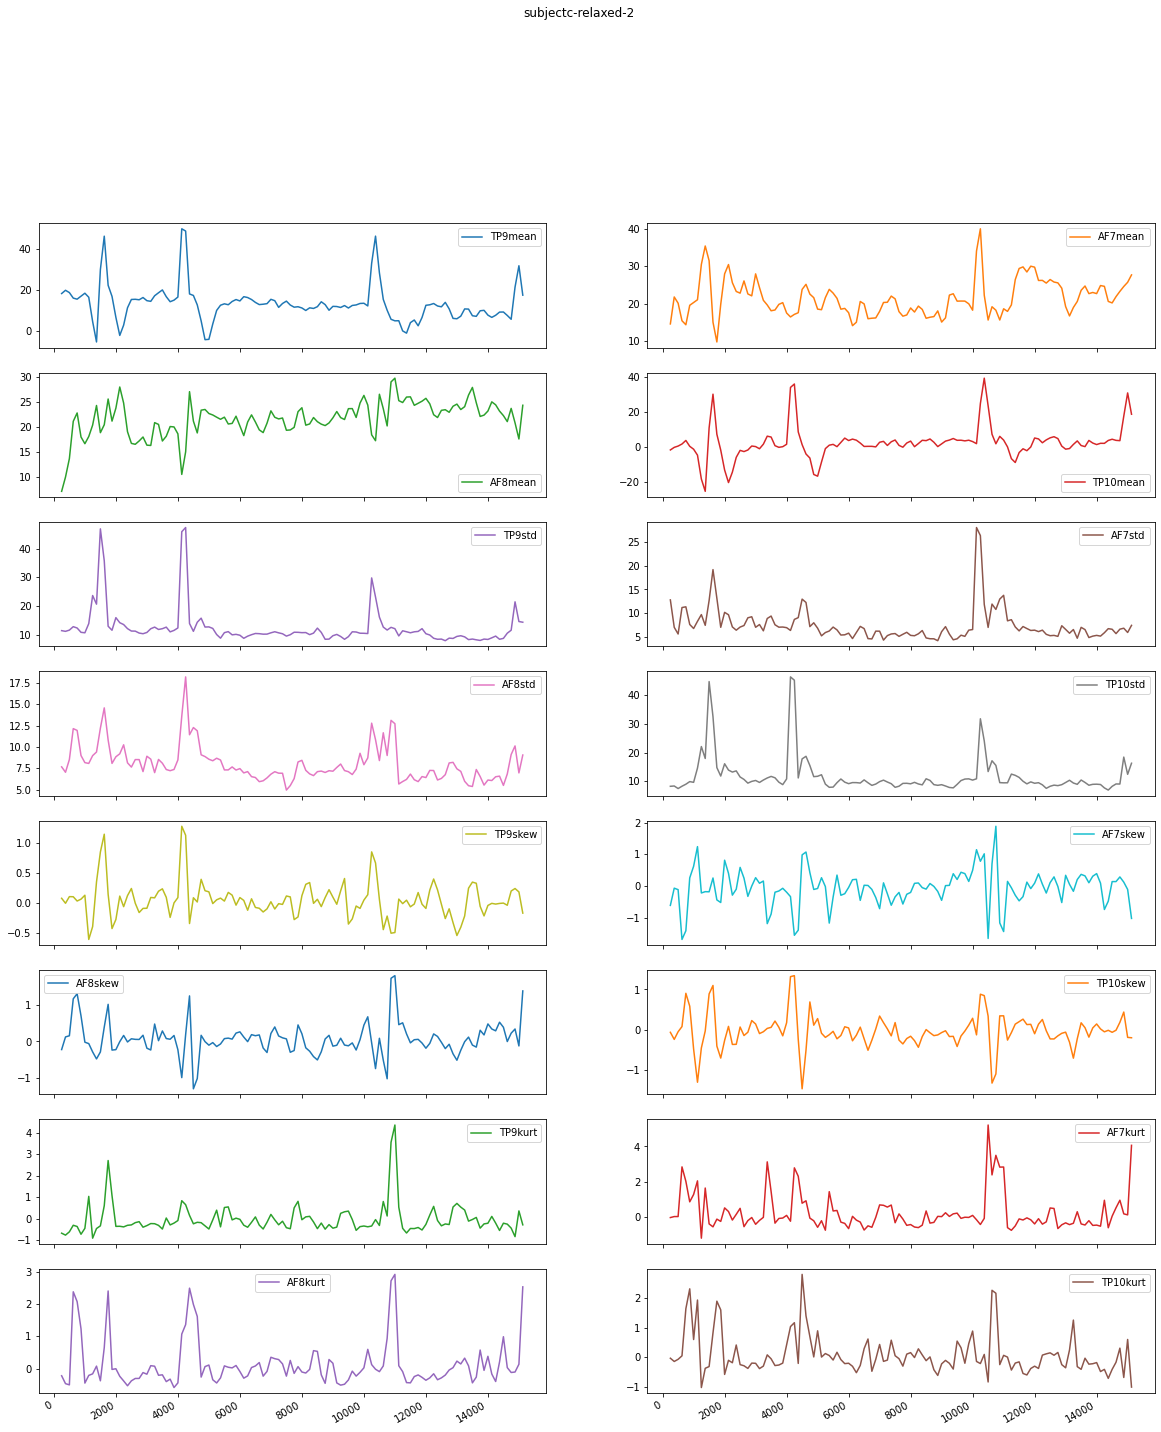

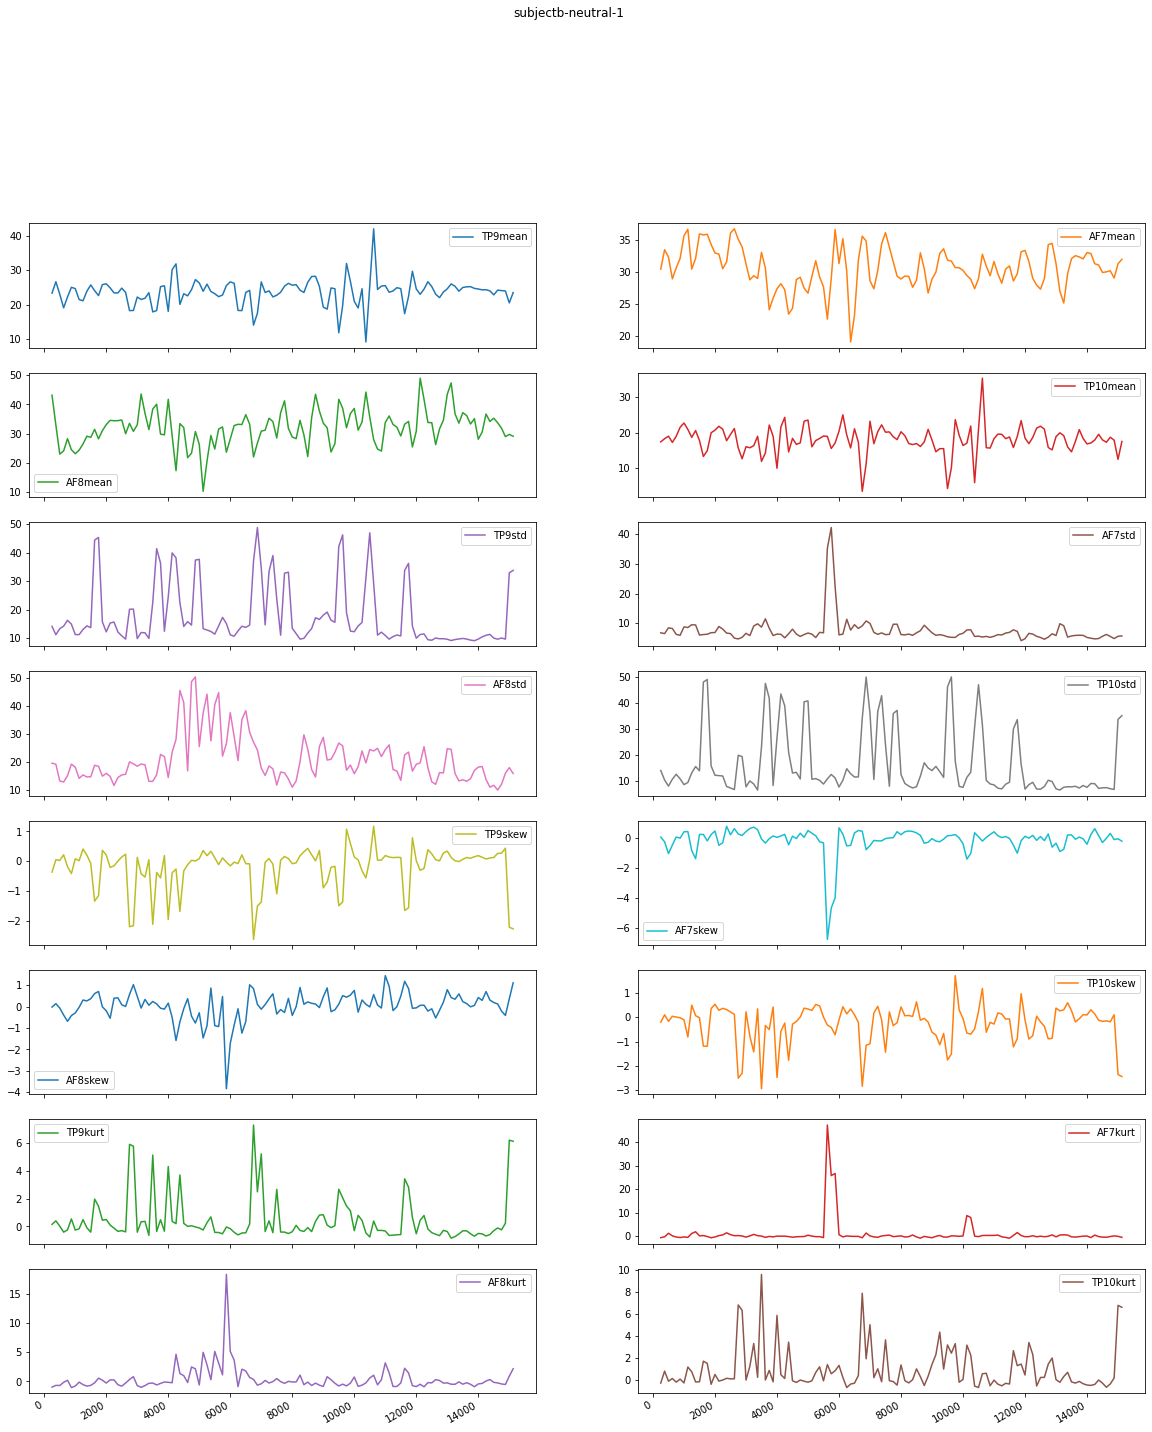

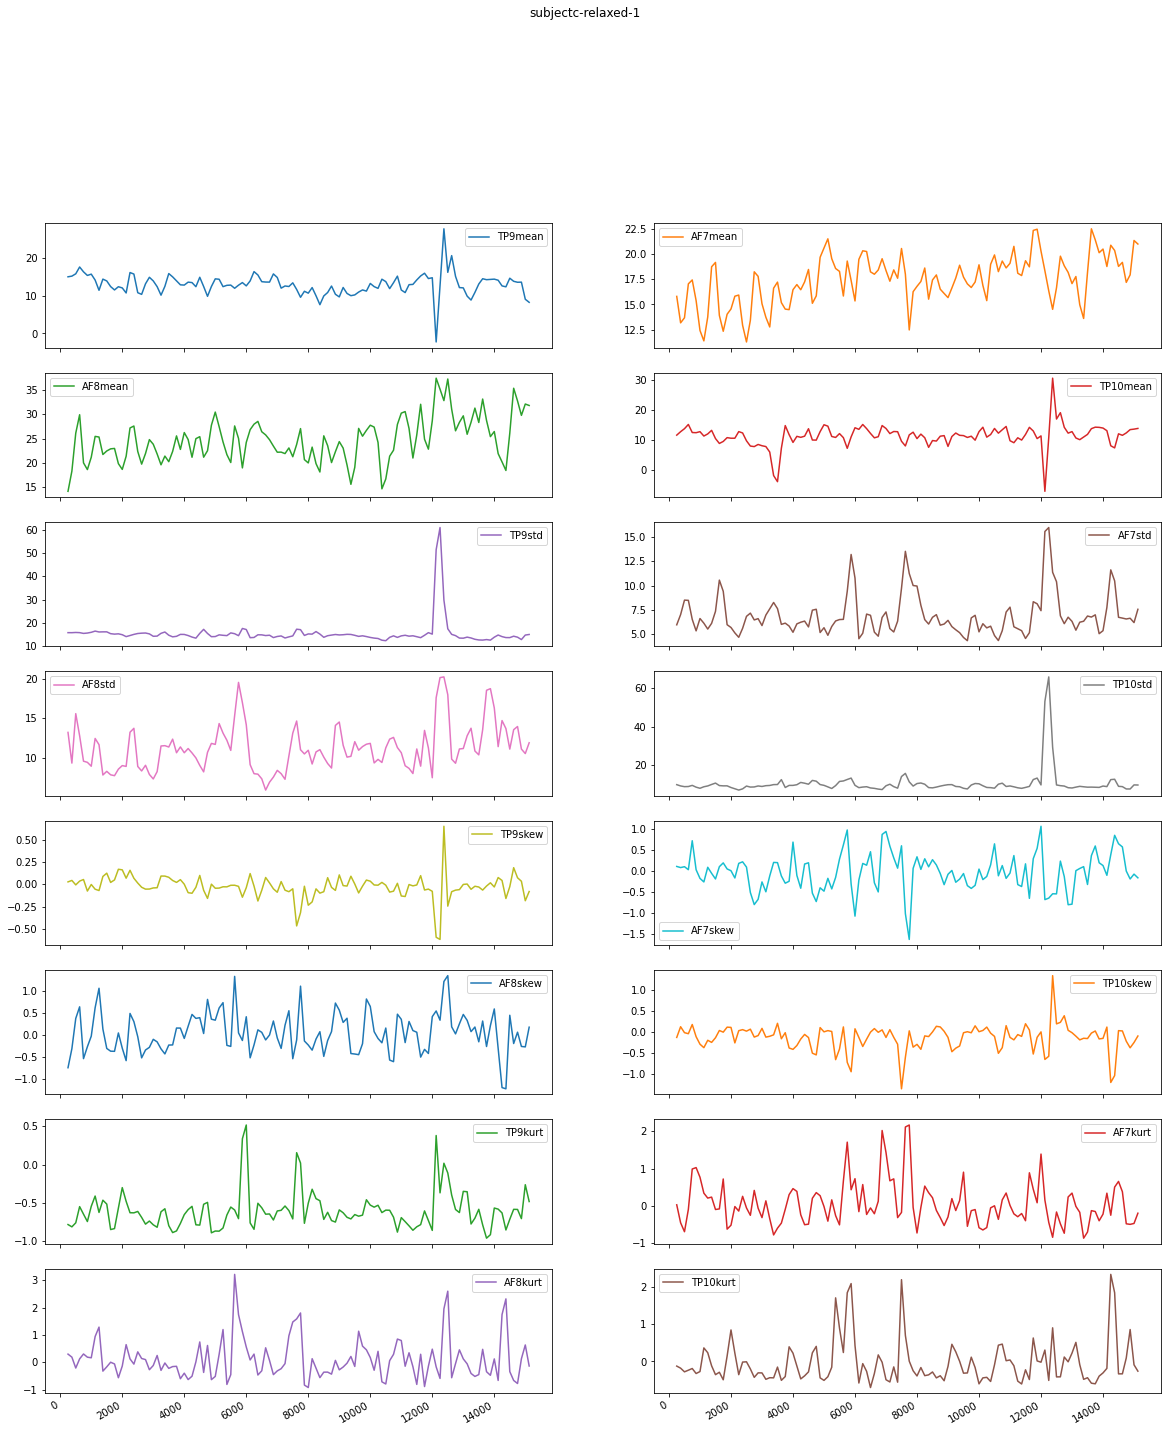

In [497]:
for f in files:
    # f = files[0]
    df, roll = setupDfAndRollingWindow(f)
    plotAndSave(f, roll)

# Challenge susggested solution

std functions --> ddof change from 1 (built-in) to 0 (as according to the paper)

In [498]:
def statMoment(x, k):
    mu_k = np.mean( (x - np.mean(x))**k )
    sigma_k = x.std(ddof=0)**k
    return mu_k / sigma_k

#skewness = statMoment(x, 3)
#kurtosis = statMoment(x, 4)

When call the stateMoment function --> use .apply(lambda x: statMoment(x, k))

np.array can index like arr[:::], even when applying the rolling function

Question to ask --> Should I use the [::125] when calling the rolling() function to save memory? Or can I also do like the plotAndSave() line 10-14, where I created a full rolling window then I use [::125] when extracting the statistical features?

Question to ask --> When using [::125] should I add to new dataframe or add a lot of new variables